<a href="https://colab.research.google.com/github/moiyajosephs/Thesis/blob/main/ELA_Data_Exploration_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import statsmodels.api as sm
from statsmodels.formula.api import ols

from statsmodels.formula.api import ols
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

There are 32 districts total in this data set.

In [ ]:
df=pd.read_excel("ela.xlsx",sheet_name="All")
df

,District,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
0,1,3,2023,All Students,520,451.532684,121,23.269230,114,21.923077,146,28.076923,139,26.730770,285,54.807693
1,1,4,2023,All Students,497,457.867218,72,14.486921,130,26.156942,118,23.742455,177,35.613682,295,59.356136
2,1,5,2023,All Students,523,455.086029,108,20.650095,104,19.885277,155,29.636711,156,29.827915,311,59.464626
3,1,6,2023,All Students,518,455.171814,74,14.285714,127,24.517374,131,25.289576,186,35.907337,317,61.196911
4,1,7,2023,All Students,568,456.084503,102,17.957747,132,23.239437,154,27.112677,180,31.690142,334,58.802818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,32,5,2013,All Students,1193,287.536469,585,49.036045,430,36.043587,137,11.483655,41,3.436714,178,14.920369
2012,32,6,2013,All Students,1336,287.276184,562,42.065868,559,41.841316,150,11.227545,65,4.865270,215,16.092813
2013,32,7,2013,All Students,1290,287.060455,602,46.666668,459,35.581394,188,14.573644,41,3.178295,229,17.751938
2014,32,8,2013,All Students,1287,283.314697,622,48.329449,446,34.654236,168,13.053613,51,3.962704,219,17.016317


# Data Analysis Methids

## Preprocessing steps
Narrowing to the years of interest for the purpose of this study.

In [ ]:
years_of_interest = [2018,2019,2022,2023]

In [ ]:
pre_pandemic = [year for year in years_of_interest if year <= 2020]
df_filtered = df[df['Year'].isin(pre_pandemic)]
df_filtered.head()

grouped_by_grade1 = df_filtered.groupby(["Year","Grade"])["Number Tested"].sum()
grouped_by_grade1

Year  Grade     
2018  3              67226
      4              67552
      5              68395
      6              65067
      7              65175
      8              63087
      All Grades    396502
2019  3              64710
      4              66772
      5              66207
      6              66150
      7              64952
      8              63669
      All Grades    392460
Name: Number Tested, dtype: int64

In [ ]:
post_pandemic = [year for year in years_of_interest if year >= 2020]
df_filtered = df[df['Year'].isin(post_pandemic)]
df_filtered.head()

grouped_by_grade = df_filtered.groupby(["Year","Grade"])["Number Tested"].sum()
grouped_by_grade

Year  Grade     
2022  3              50967
      4              53196
      5              54122
      6              53390
      7              55650
      8              55395
      All Grades    322720
2023  3              49453
      4              51008
      5              53235
      6              51996
      7              53472
      8              53919
      All Grades    313083
Name: Number Tested, dtype: int64

# Deep Dive into the Data

Here I look at the years of interest to get an understanding of the shape of the dataa.

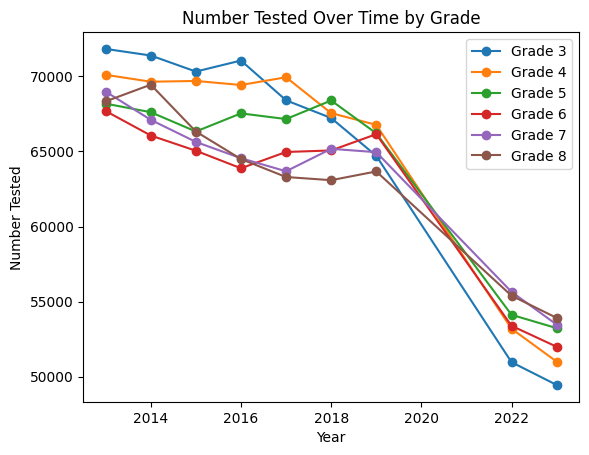

In [ ]:
#Filter out All Grades to get a more granular analysis
df = df[df["Grade"]!="All Grades"]
year_comparison = df.groupby(["Year","Grade"])["Number Tested"].sum().reset_index()


for grade in year_comparison["Grade"].unique():
  subset = year_comparison[year_comparison["Grade"] == grade]
  plt.plot(subset["Year"], subset["Number Tested"], marker = "o", label = f"Grade {grade}")

plt.xlabel("Year")
plt.ylabel("Number Tested")
plt.title("Number Tested Over Time by Grade")
plt.legend()
plt.show()


Analyzed the amount of scholars tested over the time of the data set;
- Finding: over time the number of student tested has decreased.
- the number of students in 8th grade at the lowest


% of student by level per district

In [ ]:
# Filter data for the selected years
selected_years = [2023, 2022, 2019, 2018]
df_selected_years = df[df["Year"].isin(selected_years)]

level_columns = ["# Level 1", "# Level 2","# Level 3","# Level 4" ]


### The best performing district in each year.



In [ ]:
df_selected_years.head()

,District,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
0,1,3,2023,All Students,520,451.532684,121,23.269230,114,21.923077,146,28.076923,139,26.730770,285,54.807693
1,1,4,2023,All Students,497,457.867218,72,14.486921,130,26.156942,118,23.742455,177,35.613682,295,59.356136
2,1,5,2023,All Students,523,455.086029,108,20.650095,104,19.885277,155,29.636711,156,29.827915,311,59.464626
3,1,6,2023,All Students,518,455.171814,74,14.285714,127,24.517374,131,25.289576,186,35.907337,317,61.196911
4,1,7,2023,All Students,568,456.084503,102,17.957747,132,23.239437,154,27.112677,180,31.690142,334,58.802818


In [ ]:
df_filtered = df_selected_years[["District","Grade","Year","% Level 3+4","Number Tested","Mean Scale Score"]]

In [ ]:
df_filtered

,District,Grade,Year,% Level 3+4,Number Tested,Mean Scale Score
0,1,3,2023,54.807693,520,451.532684
1,1,4,2023,59.356136,497,457.867218
2,1,5,2023,59.464626,523,455.086029
3,1,6,2023,61.196911,518,455.171814
4,1,7,2023,58.802818,568,456.084503
...,...,...,...,...,...,...
1975,32,4,2018,36.162361,813,594.464966
1976,32,5,2018,24.462061,883,594.231018
1977,32,6,2018,43.006264,958,596.520874
1978,32,7,2018,30.560928,1034,595.614136


# Average % profcient score before and after pandemic

### Average Percent proficient prepandemic and post pandemic

In [ ]:
before_2020 = df_filtered[df_filtered["Year"] < 2020]["% Level 3+4"].mean()
after_2020 = df_filtered[df_filtered["Year"] >= 2020]["% Level 3+4"].mean()

In [ ]:
before_2020, after_2020

(np.float64(44.87891713276042), np.float64(47.97476014))

### Average Mean Scale Score Pre and post pandemic

In [ ]:
before_2020 = df_filtered[df_filtered["Year"] < 2020]["Mean Scale Score"].mean()
after_2020 = df_filtered[df_filtered["Year"] >= 2020]["Mean Scale Score"].mean()

In [ ]:
before_2020, after_2020

(np.float64(599.6541082057291), np.float64(524.4130251414063))

In [ ]:
before_2020_tested = df_filtered[df_filtered["Year"] < 2020]["Number Tested"].sum()
after_2020_tested = df_filtered[df_filtered["Year"] >= 2020]["Number Tested"].sum()

before_2020_tested, after_2020_tested

(np.int64(788962), np.int64(635803))

### Number tested by district

In [ ]:
tested_by_district = df_filtered.groupby(["District", "Year"])["Number Tested"].sum().reset_index()
tested_by_district["Period"] = tested_by_district["Year"].apply(lambda x: "Before 2020" if x < 2020 else "2020 and After")
district_summary = tested_by_district.groupby(["District", "Period"])["Number Tested"].sum().reset_index()
district_comparison = district_summary.pivot(index="District", columns="Period", values="Number Tested").fillna(0).reset_index()

In [ ]:
district_comparison

Period,District,2020 and After,Before 2020
0,1,6451,8286
1,2,24685,30635
2,3,12281,15674
3,4,8067,10628
4,5,6605,9398
5,6,12590,18269
6,7,10670,14007
7,8,20544,25069
8,9,22048,30440
9,10,36184,45958


### % proficient per district before and after the pandemic

In [ ]:
performance_by_district = df_filtered.groupby(["District", "Year"])["% Level 3+4"].mean().reset_index()
performance_by_district["Period"] = performance_by_district["Year"].apply(lambda x: "Before 2020" if x < 2020 else "2020 and After")

performance_summary = performance_by_district.groupby(["District", "Period"])["% Level 3+4"].mean().reset_index()

performance_comparison = performance_summary.pivot(index="District", columns="Period", values="% Level 3+4").fillna(0).reset_index()

performance_comparison["Change"] = performance_comparison["2020 and After"] - performance_comparison["Before 2020"]

top_contributors = performance_comparison.sort_values(by="Change", ascending=False)
top_contributors

Period,District,2020 and After,Before 2020,Change
22,23,33.670369,26.540403,7.129966
15,16,39.903902,32.941812,6.962089
12,13,53.052439,46.473817,6.578623
13,14,49.814626,43.236862,6.577764
17,18,44.574747,38.713835,5.860911
19,20,64.266743,58.571799,5.694944
18,19,35.906423,30.541831,5.364592
3,4,45.709982,40.759484,4.950497
28,29,45.338127,40.599333,4.738794
16,17,46.443574,42.090301,4.353273


In [ ]:
performance_by_district = df_filtered.groupby(["District", "Year"])["Mean Scale Score"].mean().reset_index()
performance_by_district["Period"] = performance_by_district["Year"].apply(lambda x: "Before 2020" if x < 2020 else "2020 and After")

performance_summary = performance_by_district.groupby(["District", "Period"])["Mean Scale Score"].mean().reset_index()

performance_comparison = performance_summary.pivot(index="District", columns="Period", values="Mean Scale Score").fillna(0).reset_index()

performance_comparison["Change"] = performance_comparison["2020 and After"] - performance_comparison["Before 2020"]

top_contributors = performance_comparison.sort_values(by="Change", ascending=False)
top_contributors

Period,District,2020 and After,Before 2020,Change
19,20,532.486219,605.833995,-73.347776
12,13,527.172099,600.545146,-73.373047
13,14,525.281868,598.942637,-73.660769
15,16,520.535904,594.355001,-73.819097
22,23,517.136533,590.985174,-73.848640
17,18,523.057065,597.307205,-74.250140
18,19,518.179270,592.561076,-74.381805
25,26,538.468590,612.931447,-74.462858
1,2,539.067551,613.541026,-74.473475
27,28,528.322586,602.797007,-74.474421


# % Proficient by grade overall the districts.

In [ ]:
grade_year_performance = df_filtered.groupby(["Grade", "Year"])["% Level 3+4"].mean().reset_index()
grade_year_performance

,Grade,Year,% Level 3+4
0,3,2018,49.161366
1,3,2019,51.649105
2,3,2022,46.903968
3,3,2023,46.524749
4,4,2018,47.720745
5,4,2019,48.083361
6,4,2022,40.974439
7,4,2023,50.735666
8,5,2018,36.405582
9,5,2019,37.928834


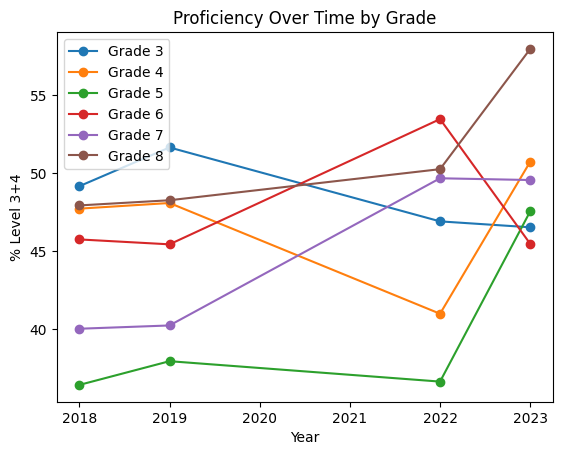

In [ ]:
for grade in grade_year_performance["Grade"].unique():
  subset = grade_year_performance[grade_year_performance["Grade"] == grade]
  plt.plot(subset["Year"], subset["% Level 3+4"], marker = "o", label = f"Grade {grade}")

plt.xlabel("Year")
plt.ylabel("% Level 3+4")
plt.title("Proficiency Over Time by Grade")
plt.legend()
plt.show()

In [ ]:
grade_year_performance = df_filtered.groupby(["Grade", "Year"])["Mean Scale Score"].mean().reset_index()
grade_year_performance

,Grade,Year,Mean Scale Score
0,3,2018,599.657719
1,3,2019,599.587690
2,3,2022,598.553185
3,3,2023,445.983413
4,4,2018,600.343594
5,4,2019,598.623987
6,4,2022,595.367317
7,4,2023,449.524964
8,5,2018,599.905481
9,5,2019,599.232761


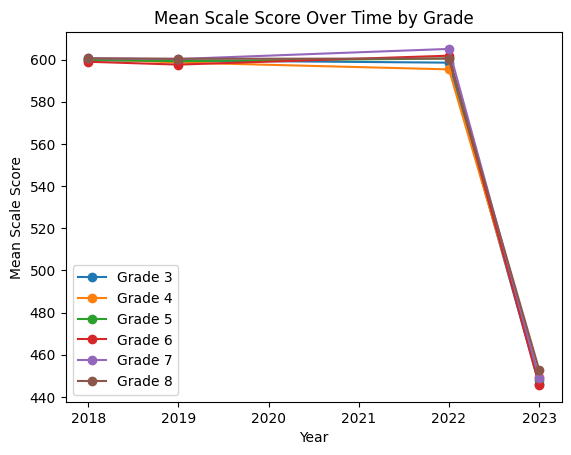

In [ ]:
for grade in grade_year_performance["Grade"].unique():
  subset = grade_year_performance[grade_year_performance["Grade"] == grade]
  plt.plot(subset["Year"], subset["Mean Scale Score"], marker = "o", label = f"Grade {grade}")

plt.xlabel("Year")
plt.ylabel("Mean Scale Score")
plt.title("Mean Scale Score Over Time by Grade")
plt.legend()
plt.show()

In [ ]:
# find the best district by grade and year

best_group_by_year = df_filtered.loc[
    df_filtered.groupby(["Grade","Year"])["% Level 3+4"].idxmax()
]

best_group_by_year

,District,Grade,Year,% Level 3+4,Number Tested,Mean Scale Score
1596,26,3,2018,78.409088,1760,614.233521
1589,26,3,2019,78.058586,1741,612.600220
70,2,3,2022,76.429565,2151,612.400269
63,2,3,2023,75.012344,2025,462.150604
85,2,4,2018,78.935448,2649,616.499084
78,2,4,2019,78.579697,2591,614.258179
71,2,4,2022,74.377548,2209,612.721619
64,2,4,2023,80.505592,2057,467.658722
86,2,5,2018,69.822273,2757,615.547363
79,2,5,2019,70.050758,2561,614.903137


In [ ]:
best_group_by_year["District"].unique()

array([26,  2])

In [ ]:
# find the best district by grade and year

best_group_by_year = df_filtered.loc[
    df_filtered.groupby(["Grade","Year"])["Mean Scale Score"].idxmax()
]

best_group_by_year

,District,Grade,Year,% Level 3+4,Number Tested,Mean Scale Score
1596,26,3,2018,78.409088,1760,614.233521
1589,26,3,2019,78.058586,1741,612.600220
70,2,3,2022,76.429565,2151,612.400269
63,2,3,2023,75.012344,2025,462.150604
85,2,4,2018,78.935448,2649,616.499084
78,2,4,2019,78.579697,2591,614.258179
71,2,4,2022,74.377548,2209,612.721619
64,2,4,2023,80.505592,2057,467.658722
86,2,5,2018,69.822273,2757,615.547363
79,2,5,2019,70.050758,2561,614.903137


In [ ]:
best_group_by_year["District"].unique()

array([26,  2])

## Ethnicity

In [ ]:
ela_ethnicity_df=pd.read_excel("ela.xlsx",sheet_name="Ethnicity")
ela_ethnicity_df

,District,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
0,1,3,2023,Asian,124,461.693542,15,12.096774,21,16.935484,36,29.032259,52,41.935482,88,70.967743
1,1,3,2023,Black,77,436.013,36,46.753246,19,24.675325,14,18.181818,8,10.38961,22,28.571428
2,1,3,2023,Hispanic,191,441.942413,61,31.937172,57,29.842932,55,28.795811,18,9.424084,73,38.219894
3,1,3,2023,Multi-Racial,32,s,s,s,s,s,s,s,s,s,s,s
4,1,3,2023,Native American,3,s,s,s,s,s,s,s,s,s,s,s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12005,32,All Grades,2013,Black,1719,290.706238,719,41.826645,652,37.929028,264,15.357766,84,4.886562,348,20.244328
12006,32,All Grades,2013,Hispanic,5460,284.404571,2708,49.597069,1996,36.556778,629,11.520146,127,2.326007,756,13.846154
12007,32,All Grades,2013,Multi-Racial,3,s,s,s,s,s,s,s,s,s,s,s
12008,32,All Grades,2013,Native American,40,s,s,s,s,s,s,s,s,s,s,s


Ethinicity deep dive into District 26

In [ ]:
ela_ethnicity_26 = ela_ethnicity_df[ela_ethnicity_df["District"]==26]

In [ ]:
ela_ethnicity_26[ela_ethnicity_26["Year"].isin([2018,2019,2020,2021,2022]) & ela_ethnicity_26["Grade"].isin(["All Grades"])][["Year","Grade", "Category","Number Tested","% Level 3+4"]]

,Year,Grade,Category,Number Tested,% Level 3+4
9455,2022,All Grades,Asian,6303,80.358559
9456,2022,All Grades,Black,474,58.649788
9457,2022,All Grades,Hispanic,1330,59.022556
9458,2022,All Grades,Multi-Racial,202,79.207924
9459,2022,All Grades,Native American,87,66.666664
9460,2022,All Grades,White,1408,65.767044
9497,2019,All Grades,Asian,6890,78.534111
9498,2019,All Grades,Black,594,62.289562
9499,2019,All Grades,Hispanic,1532,59.268929
9500,2019,All Grades,Multi-Racial,212,78.773582


In [ ]:
ela_ethnicity_2 = ela_ethnicity_df[ela_ethnicity_df["District"]==2]

In [ ]:
ela_ethnicity_2[ela_ethnicity_2["Year"].isin([2018,2019,2020,2021,2022]) & ela_ethnicity_2["Grade"].isin(["All Grades"])][["Year","Grade", "Category","Number Tested","% Level 3+4"]]

,Year,Grade,Category,Number Tested,% Level 3+4
456,2022,All Grades,Asian,3668,80.779716
457,2022,All Grades,Black,880,40.340908
458,2022,All Grades,Hispanic,2146,53.867661
459,2022,All Grades,Multi-Racial,852,85.680748
460,2022,All Grades,Native American,43,69.767441
461,2022,All Grades,White,5080,82.342522
498,2019,All Grades,Asian,4399,79.358948
499,2019,All Grades,Black,1099,39.581436
500,2019,All Grades,Hispanic,2488,54.541801
501,2019,All Grades,Multi-Racial,808,85.148514


In [ ]:
# find the worst district by grade and year

worst_group_by_year = df_filtered.loc[
    df_filtered.groupby(["Grade","Year"])["% Level 3+4"].idxmin()
]

worst_group_by_year

,District,Grade,Year,% Level 3+4,Number Tested,Mean Scale Score
714,12,3,2018,28.413488,1809,589.339966
1400,23,3,2019,31.508875,676,590.366882
700,12,3,2022,25.832657,1231,588.147034
504,9,3,2023,24.137932,1624,434.453217
715,12,4,2018,26.728868,1822,589.586731
1401,23,4,2019,26.441631,711,587.834045
701,12,4,2022,19.586105,1353,583.828552
694,12,4,2023,28.142742,1233,437.297638
716,12,5,2018,16.050745,1813,588.252625
709,12,5,2019,20.755814,1720,589.651733


In [ ]:
# find the worst district by grade and year

worst_group_by_year_mss = df_filtered.loc[
    df_filtered.groupby(["Grade","Year"])["Mean Scale Score"].idxmin()
]

worst_group_by_year_mss

,District,Grade,Year,% Level 3+4,Number Tested,Mean Scale Score
714,12,3,2018,28.413488,1809,589.339966
1400,23,3,2019,31.508875,676,590.366882
700,12,3,2022,25.832657,1231,588.147034
504,9,3,2023,24.137932,1624,434.453217
715,12,4,2018,26.728868,1822,589.586731
1401,23,4,2019,26.441631,711,587.834045
701,12,4,2022,19.586105,1353,583.828552
694,12,4,2023,28.142742,1233,437.297638
716,12,5,2018,16.050745,1813,588.252625
709,12,5,2019,20.755814,1720,589.651733


In [ ]:
worst_group_by_year_mss["District"].unique()

array([12, 23,  9,  7, 16])

In [ ]:
worst_group_by_year_12 = worst_group_by_year_mss[worst_group_by_year_mss["District"]==12]

In [ ]:
worst_group_by_year_12["% Level 3+4"].mean()

np.float64(26.205589719444443)

In [ ]:
worst_group_by_year_12["Mean Scale Score"].mean()

np.float64(556.0183648)

In [ ]:
worst_group_by_year_12 = ela_ethnicity_df[ela_ethnicity_df["District"]==12]

In [ ]:
worst_group_by_year_12

,District,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
4133,12,3,2023,Asian,53,443.30188,17,32.07547,14,26.415094,16,30.188679,6,11.320755,22,41.509434
4134,12,3,2023,Black,292,436.828766,135,46.232876,64,21.917809,68,23.287672,25,8.561644,93,31.849316
4135,12,3,2023,Hispanic,857,434.476074,417,48.658112,215,25.087515,153,17.852976,72,8.401401,225,26.254375
4136,12,3,2023,Multi-Racial,5,s,s,s,s,s,s,s,s,s,s,s
4137,12,3,2023,Native American,10,s,s,s,s,s,s,s,s,s,s,s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4497,12,All Grades,2013,Black,2952,278.674805,1675,56.741192,1017,34.451218,224,7.588076,36,1.219512,260,8.807588
4498,12,All Grades,2013,Hispanic,7289,279.100433,3975,54.534229,2572,35.286049,670,9.191933,72,0.98779,742,10.179723
4499,12,All Grades,2013,Multi-Racial,6,273.333344,3,50,3,50,0,0,0,0,0,0
4500,12,All Grades,2013,Native American,76,298.894745,23,30.263159,29,38.157894,17,22.368422,7,9.210526,24,31.578947


In [ ]:
worst_group_by_year_12[worst_group_by_year_12["Year"].isin([2018,2019,2020,2021,2022]) & worst_group_by_year_12["Grade"].isin(["All Grades"])][["Year","Grade", "Category","Number Tested","% Level 3+4","Mean Scale Score"]]

,Year,Grade,Category,Number Tested,% Level 3+4,Mean Scale Score
4211,2022,All Grades,Asian,234,39.316238,595.440185
4212,2022,All Grades,Black,1891,27.657324,590.862488
4213,2022,All Grades,Hispanic,5455,25.27956,590.110352
4214,2022,All Grades,Multi-Racial,32,25,592.25
4215,2022,All Grades,Native American,96,35.416668,596.572937
4216,2022,All Grades,White,131,s,s
4253,2019,All Grades,Asian,281,43.060497,597.20282
4254,2019,All Grades,Black,2433,24.660912,589.21991
4255,2019,All Grades,Hispanic,6948,25.316637,589.235291
4256,2019,All Grades,Multi-Racial,30,36.666668,594.733337


In [ ]:
worst_group_by_year_23 = worst_group_by_year_mss[worst_group_by_year_mss["District"]==23]

## Economically Disadvantaged

In [ ]:
ela_econ_df=pd.read_excel("ela.xlsx",sheet_name="Econ Status")

In [ ]:
ela_econ_12 = ela_econ_df[ela_econ_df["District"]==12]


In [ ]:
ela_econ_12[ela_econ_12["Year"].isin([2018,2019,2020,2021,2022]) & ela_econ_12["Grade"].isin(["All Grades"])][["Year","Grade", "Category","Number Tested","% Level 3+4","Mean Scale Score"]]

,Year,Grade,Category,Number Tested,% Level 3+4,Mean Scale Score
1412,2022,All Grades,Econ Disadv,7367,26.062170,590.381714
1413,2022,All Grades,Not Econ Disadv,473,31.923889,593.190247
1426,2019,All Grades,Econ Disadv,9195,25.198477,589.201660
1427,2019,All Grades,Not Econ Disadv,765,32.418301,592.439209
1440,2018,All Grades,Econ Disadv,9627,23.184793,589.362610
1441,2018,All Grades,Not Econ Disadv,696,32.040230,594.001465


In [ ]:
ela_econ_26 = ela_econ_df[ela_econ_df["District"]==26]
ela_econ_2 = ela_econ_df[ela_econ_df["District"]==2]
ela_econ_20 = ela_econ_df[ela_econ_df["District"]==20]

In [ ]:
ela_econ_26[ela_econ_26["Year"].isin([2018,2019,2020,2021,2022]) & ela_econ_26["Grade"].isin(["All Grades"])][["Year","Grade", "Category","Number Tested","% Level 3+4"]]

,Year,Grade,Category,Number Tested,% Level 3+4
3176,2022,All Grades,Econ Disadv,5140,69.396889
3177,2022,All Grades,Not Econ Disadv,4664,79.438248
3190,2019,All Grades,Econ Disadv,5793,67.771446
3191,2019,All Grades,Not Econ Disadv,5375,78.213951
3204,2018,All Grades,Econ Disadv,6007,67.188278
3205,2018,All Grades,Not Econ Disadv,5206,79.523628


In [ ]:
ela_econ_2[ela_econ_2["Year"].isin([2018,2019,2020,2021,2022]) & ela_econ_2["Grade"].isin(["All Grades"])][["Year","Grade", "Category","Number Tested","% Level 3+4"]]

,Year,Grade,Category,Number Tested,% Level 3+4
152,2022,All Grades,Econ Disadv,4498,58.559360
153,2022,All Grades,Not Econ Disadv,8171,83.013092
166,2019,All Grades,Econ Disadv,5534,59.179615
167,2019,All Grades,Not Econ Disadv,9730,83.617676
180,2018,All Grades,Econ Disadv,5710,57.530647
181,2018,All Grades,Not Econ Disadv,9661,84.132080


In [ ]:
ela_econ_2[ela_econ_2["Year"].isin([2018,2019,2020,2021,2022]) & ela_econ_2["Grade"].isin(["All Grades"])][["Year","Grade", "Category","Number Tested","% Level 3+4"]]

,Year,Grade,Category,Number Tested,% Level 3+4
152,2022,All Grades,Econ Disadv,4498,58.559360
153,2022,All Grades,Not Econ Disadv,8171,83.013092
166,2019,All Grades,Econ Disadv,5534,59.179615
167,2019,All Grades,Not Econ Disadv,9730,83.617676
180,2018,All Grades,Econ Disadv,5710,57.530647
181,2018,All Grades,Not Econ Disadv,9661,84.132080


## Students with Disabilities

In [ ]:
ela_swd_df=pd.read_excel("ela.xlsx",sheet_name="SWD")

In [ ]:
ela_swd_26 = ela_swd_df[ela_swd_df["District"]==26]
ela_swd_2 = ela_swd_df[ela_swd_df["District"]==2]
ela_swd_20 = ela_swd_df[ela_swd_df["District"]==20]

In [ ]:
ela_swd_26[ela_swd_26["Year"].isin([2018,2019,2020,2021,2022]) & ela_swd_26["Grade"].isin(["All Grades"])][["Year","Grade", "Category","Number Tested","% Level 3+4","Mean Scale Score"]]

,Year,Grade,Category,Number Tested,% Level 3+4,Mean Scale Score
3176,2022,All Grades,Not SWD,8452,81.069572,617.186218
3177,2022,All Grades,SWD,1352,31.065088,593.801758
3190,2019,All Grades,Not SWD,9600,79.729164,615.950195
3191,2019,All Grades,SWD,1568,30.357143,592.355896
3204,2018,All Grades,Not SWD,9671,79.836624,616.287781
3205,2018,All Grades,SWD,1542,29.507133,594.114807


In [ ]:
ela_swd_2[ela_swd_2["Year"].isin([2018,2019,2020,2021,2022]) & ela_swd_2["Grade"].isin(["All Grades"])][["Year","Grade", "Category","Number Tested","% Level 3+4","Mean Scale Score"]]

,Year,Grade,Category,Number Tested,% Level 3+4,Mean Scale Score
152,2022,All Grades,Not SWD,10271,82.143898,617.359436
153,2022,All Grades,SWD,2398,40.867390,597.735596
166,2019,All Grades,Not SWD,12293,83.071671,617.386536
167,2019,All Grades,SWD,2971,40.356781,596.655334
180,2018,All Grades,Not SWD,12436,82.220970,617.672485
181,2018,All Grades,SWD,2935,40.477001,597.578552


In [ ]:
ela_swd_20[ela_swd_20["Year"].isin([2018,2019,2020,2021,2022]) & ela_swd_20["Grade"].isin(["All Grades"])][["Year","Grade", "Category","Number Tested","% Level 3+4","Mean Scale Score"]]

,Year,Grade,Category,Number Tested,% Level 3+4,Mean Scale Score
2420,2022,All Grades,Not SWD,17397,71.040985,611.657776
2421,2022,All Grades,SWD,3444,26.277584,591.302856
2434,2019,All Grades,Not SWD,19637,66.395073,609.135315
2435,2019,All Grades,SWD,3626,20.297850,586.975708
2448,2018,All Grades,Not SWD,19841,64.603600,609.159180
2449,2018,All Grades,SWD,3590,20.863510,588.490540


provide summary on all the districts here


In [ ]:
ela_swd_12 = ela_swd_df[ela_swd_df["District"]==12]

In [ ]:
ela_swd_12[ela_swd_12["Year"].isin([2018,2019,2020,2021,2022]) & ela_swd_12["Grade"].isin(["All Grades"])][["Year","Grade", "Category","Number Tested","% Level 3+4","Mean Scale Score"]]

,Year,Grade,Category,Number Tested,% Level 3+4,Mean Scale Score
1412,2022,All Grades,Not SWD,5612,33.606556,594.773010
1413,2022,All Grades,SWD,2228,8.303411,579.916992
1426,2019,All Grades,Not SWD,7143,32.871342,594.142395
1427,2019,All Grades,SWD,2817,7.703230,577.552734
1440,2018,All Grades,Not SWD,7475,29.966555,593.681580
1441,2018,All Grades,SWD,2848,7.549157,579.160461


# Statistical Differences


In [ ]:
from scipy.stats import ttest_ind

### Ethnicity Staticial

In [ ]:
df_ethnicity_comparison = ela_ethnicity_df[
     (ela_ethnicity_df["Grade"] == "All Grades")
].copy()

df_ethnicity_comparison["% Level 3+4"] = pd.to_numeric(df_ethnicity_comparison["% Level 3+4"], errors="coerce")

results = []

for district in df_ethnicity_comparison["District"].unique():
  for ethnicity in df_ethnicity_comparison["Category"].unique():
    df_group = df_ethnicity_comparison[
        (df_ethnicity_comparison["District"] == district) &
        (df_ethnicity_comparison["Category"] == ethnicity)
    ]
    pre = df_group[df_group["Year"].isin([2018, 2019])]["% Level 3+4"].dropna()
    post = df_group[df_group["Year"].isin([2022, 2023])]["% Level 3+4"].dropna()
    if len(pre) > 1 and len(post) > 1:
      t_stat, p_val = ttest_ind(post, pre, equal_var=False)
      results.append({
          "District": district,
          "Ethnicity": ethnicity,
          "Pre Avg": pre.mean(),
          "Post Avg": post.mean(),
          "Change": post.mean() - pre.mean(),
          "p-value": p_val})


results_df = pd.DataFrame(results)
results_df

,District,Ethnicity,Pre Avg,Post Avg,Change,p-value
0,1,Asian,75.878719,79.312042,3.433323,0.323513
1,1,Black,30.321810,31.298449,0.976639,0.726418
2,1,Hispanic,38.118166,38.483736,0.365570,0.931849
3,1,Multi-Racial,83.312714,85.545460,2.232746,0.384369
4,1,Native American,42.187500,25.148809,-17.038691,0.165559
...,...,...,...,...,...,...
155,31,White,63.321129,66.745468,3.424339,0.075823
156,32,Black,40.497515,46.908222,6.410707,0.250658
157,32,Hispanic,33.577419,33.454626,-0.122793,0.893437
158,32,Multi-Racial,79.166664,56.483515,-22.683149,0.293823


In [ ]:
results_df[results_df["p-value"] < 0.05]

,District,Ethnicity,Pre Avg,Post Avg,Change,p-value
44,10,Asian,57.165039,64.783894,7.618855,0.034341
53,11,Multi-Racial,42.129631,53.386482,11.256851,0.003249
78,16,Multi-Racial,44.155844,53.939394,9.783550,0.047157
84,18,Asian,36.965120,48.359289,11.394169,0.041812
95,20,Asian,66.382961,74.080589,7.697628,0.035475
96,20,Hispanic,40.096651,44.801477,4.704826,0.034043
98,21,Asian,66.555843,68.247746,1.691902,0.046662
107,22,White,61.188789,58.818392,-2.370398,0.049848
144,30,Asian,73.978592,78.334328,4.355736,0.037079


Across districts there is no statistical difference between performance pre and post pandemic
All districts declined.
The smallest drop was -73.39 points (District 26), and the largest was -80.35 points (District 32).

In [ ]:
df_ethnicity_comparison = ela_ethnicity_df[
     (ela_ethnicity_df["Grade"] == "All Grades")
].copy()

df_ethnicity_comparison['Mean Scale Score'] = pd.to_numeric(df_ethnicity_comparison['Mean Scale Score'], errors='coerce')

results = []

for district in df_ethnicity_comparison["District"].unique():
  for ethnicity in df_ethnicity_comparison["Category"].unique():
    df_group = df_ethnicity_comparison[
        (df_ethnicity_comparison["District"] == district) &
        (df_ethnicity_comparison["Category"] == ethnicity)
    ]
    pre = df_group[df_group["Year"].isin([2018, 2019])]["Mean Scale Score"].dropna()
    post = df_group[df_group["Year"].isin([2022, 2023])]["Mean Scale Score"].dropna()
    if len(pre) > 1 and len(post) > 1:
      t_stat, p_val = ttest_ind(post, pre, equal_var=False)
      results.append({
          "District": district,
          "Ethnicity": ethnicity,
          "Pre Avg": pre.mean(),
          "Post Avg": post.mean(),
          "Change": post.mean() - pre.mean(),
          "p-value": p_val})


results_df = pd.DataFrame(results)
results_df

,District,Ethnicity,Pre Avg,Post Avg,Change,p-value
0,1,Asian,615.617035,542.747711,-72.869324,0.506828
1,1,Black,593.677032,516.202347,-77.474686,0.493172
2,1,Hispanic,597.180267,520.295196,-76.885071,0.493127
3,1,Multi-Racial,622.139893,546.878098,-75.261795,0.501918
4,1,Native American,599.359375,518.127991,-81.231384,0.467133
...,...,...,...,...,...,...
155,31,White,608.330261,533.623749,-74.706512,0.504129
156,32,Black,597.693085,523.497223,-74.195862,0.507202
157,32,Hispanic,594.045136,516.205566,-77.839569,0.496928
158,32,Multi-Racial,609.986114,527.952744,-82.033371,0.492495


In [ ]:
results_df[results_df["p-value"] < 0.05]

,District,Ethnicity,Pre Avg,Post Avg,Change,p-value


# "Were some districts more impacted than others overall?"

In [ ]:
def year_group(year):
    if year in [2018, 2019, 2020]:
        return 'Pre-2020'
    elif year in [2021, 2022, 2023]:
        return 'Post-2020'
    else:
        return None


In [ ]:
ela_ethnicity_stat = ela_ethnicity_df.copy()

ela_ethnicity_stat['Year Group'] = ela_ethnicity_stat['Year'].apply(year_group)

ela_ethnicity_stat = ela_ethnicity_stat[ela_ethnicity_stat['Year Group'].notna()]

ela_ethnicity_stat[['District', 'Year', 'Year Group', 'Mean Scale Score']]

,District,Year,Year Group,Mean Scale Score
0,1,2023,Post-2020,461.693542
1,1,2023,Post-2020,436.013
2,1,2023,Post-2020,441.942413
3,1,2023,Post-2020,s
4,1,2023,Post-2020,s
...,...,...,...,...
11805,32,2018,Pre-2020,598.06958
11806,32,2018,Pre-2020,594.825012
11807,32,2018,Pre-2020,609.222229
11808,32,2018,Pre-2020,597.827576


In [ ]:
df_all = df[df['Category'] == 'All Students'].copy()

df_all['Year Group'] = df_all['Year'].apply(year_group)

df_all = df_all[df_all['Year Group'].notna()]

df_all[['District', 'Year', 'Year Group', 'Mean Scale Score']].head()

,District,Year,Year Group,Mean Scale Score
0,1,2023,Post-2020,451.532684
1,1,2023,Post-2020,457.867218
2,1,2023,Post-2020,455.086029
3,1,2023,Post-2020,455.171814
4,1,2023,Post-2020,456.084503


In [ ]:


model = ols('Q("Mean Scale Score") ~ C(District) + C(Q("Year Group")) + C(District):C(Q("Year Group"))', data=df_all).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
C(District),3.145664e+04,31.0,0.322170,9.998566e-01
"C(Q(""Year Group""))",1.086954e+06,1.0,345.100270,5.447307e-63
"C(District):C(Q(""Year Group""))",2.376013e+02,31.0,0.002433,1.000000e+00
Residual,2.217373e+06,704.0,NaN,NaN


### T Test on Specific Districts

In [ ]:

df_ethnicity_filtered = ela_ethnicity_df[
    (ela_ethnicity_df["Grade"] == "All Grades")
].copy()

df_ethnicity_filtered["% Level 3+4"] = pd.to_numeric(df_ethnicity_filtered["% Level 3+4"], errors="coerce")

from scipy.stats import ttest_ind

results = []

for district in [26, 20]:
    for ethnicity in df_ethnicity_filtered["Category"].unique():
        df_group = df_ethnicity_filtered[
            (df_ethnicity_filtered["District"] == district) &
            (df_ethnicity_filtered["Category"] == ethnicity)
        ]

        pre = df_group[df_group["Year"].isin([2018, 2019])]["% Level 3+4"].dropna()
        post = df_group[df_group["Year"].isin([2022, 2023])]["% Level 3+4"].dropna()

        if len(pre) > 1 and len(post) > 1:
            t_stat, p_val = ttest_ind(post, pre, equal_var=False)
            results.append({
                "District": district,
                "Ethnicity": ethnicity,
                "Pre Avg": pre.mean(),
                "Post Avg": post.mean(),
                "Change": post.mean() - pre.mean(),
                "p-value": p_val
            })

results_df = pd.DataFrame(results)
results_df

,District,Ethnicity,Pre Avg,Post Avg,Change,p-value
0,26,Asian,78.293911,80.882797,2.588886,0.085044
1,26,Black,62.052315,59.661972,-2.390343,0.241024
2,26,Hispanic,60.132803,59.156294,-0.976509,0.458131
3,26,White,66.445118,66.578331,0.133213,0.906298
4,20,Asian,66.382961,74.080589,7.697628,0.035475
5,20,Hispanic,40.096651,44.801477,4.704826,0.034043
6,20,White,62.200088,65.723194,3.523106,0.214246


In [ ]:
results_df[results_df["p-value"] < 0.05]

,District,Ethnicity,Pre Avg,Post Avg,Change,p-value
4,20,Asian,66.382961,74.080589,7.697628,0.035475
5,20,Hispanic,40.096651,44.801477,4.704826,0.034043


In [ ]:
growth_proficiency_df = ela_ethnicity_df[ela_ethnicity_df["Grade"] == "All Grades"].copy()

growth_proficiency_df["% Level 3+4"] = pd.to_numeric(growth_proficiency_df["% Level 3+4"], errors="coerce")
growth_proficiency_df["Mean Scale Score"] = pd.to_numeric(growth_proficiency_df["Mean Scale Score"], errors="coerce")

district_metrics = growth_proficiency_df.groupby(["District", "Year"])[["% Level 3+4", "Mean Scale Score"]].mean().reset_index()

growth_results = []

for district in district_metrics["District"].unique():
    df_group = district_metrics[district_metrics["District"] == district]

    pre = df_group[df_group["Year"].isin([2018, 2019])]
    post = df_group[df_group["Year"].isin([2022, 2023])]

    if len(pre) > 1 and len(post) > 1:
        pre_proficiency = pre["% Level 3+4"].mean()
        post_proficiency = post["% Level 3+4"].mean()
        pre_growth = pre["Mean Scale Score"].mean()
        post_growth = post["Mean Scale Score"].mean()

        growth_results.append({
            "District": district,
            "Pre Proficiency": pre_proficiency,
            "Post Proficiency": post_proficiency,
            "Proficiency Change": post_proficiency - pre_proficiency,
            "Pre Growth (Scale Score)": pre_growth,
            "Post Growth (Scale Score)": post_growth,
            "Growth Change": post_growth - pre_growth
        })

growth_proficiency_comparison = pd.DataFrame(growth_results)
growth_proficiency_comparison

,District,Pre Proficiency,Post Proficiency,Proficiency Change,Pre Growth (Scale Score),Post Growth (Scale Score),Growth Change
0,1,58.710857,57.160282,-1.550575,607.811666,531.458674,-76.352992
1,2,68.299346,73.671081,5.371735,610.630315,537.948139,-72.682176
2,3,65.130067,64.077694,-1.052373,610.271581,532.986337,-77.285244
3,4,55.436841,60.783776,5.346935,605.889295,532.275068,-73.614227
4,5,40.613348,47.424088,6.810740,597.942886,524.160678,-73.782209
5,6,51.001399,49.335115,-1.666284,600.718577,524.447655,-76.270922
6,7,30.732022,32.632074,1.900052,592.555713,515.949727,-76.605986
7,8,42.804238,44.203605,1.399367,598.175491,521.782570,-76.392921
8,9,33.592728,38.550640,4.957911,593.765742,518.561918,-75.203824
9,10,43.914815,48.823814,4.908999,598.883494,524.198608,-74.684886


In [ ]:
growth_proficiency_comparison["Growth Change"].mean()

np.float64(-74.96863467658855)

In [ ]:
growth_proficiency_comparison["Proficiency Change"].mean()

np.float64(3.1459366807447893)

In [ ]:
growth_proficiency_comparison.loc[growth_proficiency_comparison["Proficiency Change"].idxmax()]


,19
District,20.000000
Pre Proficiency,56.235344
Post Proficiency,64.580935
Proficiency Change,8.345592
Pre Growth (Scale Score),604.984701
Post Growth (Scale Score),532.961692
Growth Change,-72.023009


In [ ]:
growth_proficiency_comparison.loc[growth_proficiency_comparison["Proficiency Change"].idxmin()]


,22
District,23.000000
Pre Proficiency,36.027006
Post Proficiency,33.407021
Proficiency Change,-2.619984
Pre Growth (Scale Score),595.193710
Post Growth (Scale Score),517.062682
Growth Change,-78.131028


In [ ]:
growth_proficiency_comparison.loc[growth_proficiency_comparison["Growth Change"].idxmax()]

,16
District,17.000000
Pre Proficiency,40.611938
Post Proficiency,48.565344
Proficiency Change,7.953406
Pre Growth (Scale Score),596.564537
Post Growth (Scale Score),524.579585
Growth Change,-71.984952


In [ ]:
growth_proficiency_comparison.loc[growth_proficiency_comparison["Growth Change"].idxmin()]

,22
District,23.000000
Pre Proficiency,36.027006
Post Proficiency,33.407021
Proficiency Change,-2.619984
Pre Growth (Scale Score),595.193710
Post Growth (Scale Score),517.062682
Growth Change,-78.131028


In [ ]:

prof_threshold = 1.5
growth_threshold = 2

standout_districts = growth_proficiency_comparison[
    (
        (growth_proficiency_comparison["Proficiency Change"] > prof_threshold) &
        (growth_proficiency_comparison["Growth Change"] < -growth_threshold)
    ) |
    (
        (growth_proficiency_comparison["Proficiency Change"] < -prof_threshold) &
        (growth_proficiency_comparison["Growth Change"] > growth_threshold)
    )
]


In [ ]:
standout_districts

,District,Pre Proficiency,Post Proficiency,Proficiency Change,Pre Growth (Scale Score),Post Growth (Scale Score),Growth Change
1,2,68.299346,73.671081,5.371735,610.630315,537.948139,-72.682176
3,4,55.436841,60.783776,5.346935,605.889295,532.275068,-73.614227
4,5,40.613348,47.424088,6.810740,597.942886,524.160678,-73.782209
6,7,30.732022,32.632074,1.900052,592.555713,515.949727,-76.605986
8,9,33.592728,38.550640,4.957911,593.765742,518.561918,-75.203824
9,10,43.914815,48.823814,4.908999,598.883494,524.198608,-74.684886
10,11,42.397214,45.239271,2.842057,598.119787,522.727112,-75.392675
12,13,54.257678,57.663691,3.406013,603.832637,529.265128,-74.567509
13,14,50.422929,57.947553,7.524625,601.836583,529.426679,-72.409904
14,15,58.676104,62.200577,3.524473,605.581637,531.124171,-74.457466


### Anova of all the all students

In [ ]:
ela_ethnicity_df

,District,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
0,1,3,2023,Asian,124,461.693542,15,12.096774,21,16.935484,36,29.032259,52,41.935482,88,70.967743
1,1,3,2023,Black,77,436.013,36,46.753246,19,24.675325,14,18.181818,8,10.38961,22,28.571428
2,1,3,2023,Hispanic,191,441.942413,61,31.937172,57,29.842932,55,28.795811,18,9.424084,73,38.219894
3,1,3,2023,Multi-Racial,32,s,s,s,s,s,s,s,s,s,s,s
4,1,3,2023,Native American,3,s,s,s,s,s,s,s,s,s,s,s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12005,32,All Grades,2013,Black,1719,290.706238,719,41.826645,652,37.929028,264,15.357766,84,4.886562,348,20.244328
12006,32,All Grades,2013,Hispanic,5460,284.404571,2708,49.597069,1996,36.556778,629,11.520146,127,2.326007,756,13.846154
12007,32,All Grades,2013,Multi-Racial,3,s,s,s,s,s,s,s,s,s,s,s
12008,32,All Grades,2013,Native American,40,s,s,s,s,s,s,s,s,s,s,s


In [ ]:
ela_ethnicity_stat[['District', 'Year', 'Year Group', 'Mean Scale Score']].head()

,District,Year,Year Group,Mean Scale Score
0,1,2023,Post-2020,461.693542
1,1,2023,Post-2020,436.013
2,1,2023,Post-2020,441.942413
3,1,2023,Post-2020,s
4,1,2023,Post-2020,s


In [ ]:
ela_ethnicity_stat = ela_ethnicity_stat[ela_ethnicity_stat['Mean Scale Score'] != 's']
ela_ethnicity_stat['Mean Scale Score'] = pd.to_numeric(ela_ethnicity_stat['Mean Scale Score'])

model = ols('Q("Mean Scale Score") ~ C(District) + C(Q("Year Group")) + C(District):C(Q("Year Group"))', data=ela_ethnicity_stat).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table

<ipython-input-149-37c565ac78e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ela_ethnicity_stat['Mean Scale Score'] = pd.to_numeric(ela_ethnicity_stat['Mean Scale Score'])


,sum_sq,df,F,PR(>F)
C(District),1.594147e+05,31.0,1.748147,0.00635
"C(Q(""Year Group""))",6.660019e+06,1.0,2264.053963,0.00000
"C(District):C(Q(""Year Group""))",6.619704e+03,31.0,0.072592,1.00000
Residual,1.382568e+07,4700.0,NaN,NaN


#### which ethnicity was affected most

In [ ]:
ethnicity_grouped = (
    ela_ethnicity_stat.groupby(['Category', 'Year Group'])['Mean Scale Score']
    .mean()
    .unstack()
)

In [ ]:
ethnicity_grouped['Difference (Post - Pre)'] = ethnicity_grouped['Post-2020'] - ethnicity_grouped['Pre-2020']
ethnicity_grouped = ethnicity_grouped.sort_values(by='Difference (Post - Pre)')

ethnicity_grouped

Year Group,Post-2020,Pre-2020,Difference (Post - Pre)
Category,,,
Multi-Racial,530.683513,607.611447,-76.927935
Hispanic,519.996350,596.052479,-76.056128
Black,520.074487,595.333284,-75.258797
Native American,523.986874,599.238560,-75.251686
White,530.556317,604.219558,-73.663242
Asian,534.211079,607.208649,-72.997570


In [ ]:
model_ethnicity = ols('Q("Mean Scale Score") ~ C(Category) + C(Q("Year Group")) + C(Category):C(Q("Year Group"))', data=ela_ethnicity_stat).fit()
anova_ethnicity = sm.stats.anova_lm(model_ethnicity, typ=2)

anova_ethnicity

,sum_sq,df,F,PR(>F)
C(Category),1.352637e+05,5.0,9.279002,8.329325e-09
"C(Q(""Year Group""))",6.686778e+06,1.0,2293.542471,0.000000e+00
"C(Category):C(Q(""Year Group""))",2.089000e+03,5.0,0.143304,9.820400e-01
Residual,1.385436e+07,4752.0,NaN,NaN


## SWD

In [ ]:
ela_swd_df

,District,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
0,1,3,2023,Not SWD,408,457.181366,56,13.725491,94,23.039215,124,30.392157,134,32.843136,258,63.235294
1,1,3,2023,SWD,112,430.955353,65,58.035713,20,17.857143,22,19.642857,5,4.464286,27,24.107143
2,1,4,2023,Not SWD,415,463.016876,36,8.674699,100,24.096386,105,25.301205,174,41.927711,279,67.228912
3,1,4,2023,SWD,82,431.804871,36,43.902439,30,36.585365,13,15.853659,3,3.658537,16,19.512196
4,1,5,2023,Not SWD,413,461.508484,48,11.622276,73,17.675545,139,33.656174,153,37.046005,292,70.702179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4027,32,7,2013,SWD,214,257.172882,171,79.906540,38,17.757010,5,2.336449,0,0.000000,5,2.336449
4028,32,8,2013,Not SWD,1066,288.746704,441,41.369606,413,38.742966,161,15.103189,51,4.784240,212,19.887430
4029,32,8,2013,SWD,221,257.113129,181,81.900452,33,14.932127,7,3.167421,0,0.000000,7,3.167421
4030,32,All Grades,2013,Not SWD,6123,292.273224,2460,40.176384,2508,40.960312,914,14.927323,241,3.935979,1155,18.863302


In [ ]:
ela_swd_df['Year Group'] = ela_swd_df['Year'].apply(year_group)

ela_swd_df = ela_swd_df[ela_swd_df['Year Group'].notna()]

ela_swd_df = ela_swd_df[ela_swd_df['Mean Scale Score'] != 's']
ela_swd_df['Mean Scale Score'] = pd.to_numeric(ela_swd_df['Mean Scale Score'])

ela_swd_df[['District', 'Year', 'Year Group', 'Mean Scale Score']].head()

,District,Year,Year Group,Mean Scale Score
0,1,2023,Post-2020,457.181366
1,1,2023,Post-2020,430.955353
2,1,2023,Post-2020,463.016876
3,1,2023,Post-2020,431.804871
4,1,2023,Post-2020,461.508484


### Anova

In [ ]:
model_swd = ols('Q("Mean Scale Score") ~ C(Category) + C(Q("Year Group")) + C(Category):C(Q("Year Group"))', data=ela_swd_df).fit()
anova_table_swd = sm.stats.anova_lm(model_swd, typ=2)

anova_table_swd

,sum_sq,df,F,PR(>F)
C(Category),1.667817e+05,1.0,56.765067,7.754219e-14
"C(Q(""Year Group""))",2.533937e+06,1.0,862.439311,4.890755e-155
"C(Category):C(Q(""Year Group""))",1.320765e+00,1.0,0.000450,9.830868e-01
Residual,5.253332e+06,1788.0,NaN,NaN


# Which grade was affected the most

In [ ]:
grade_grouped = (
    ela_ethnicity_stat.groupby(['Grade', 'Year Group'])['Mean Scale Score']
    .mean()
    .unstack()
)

grade_grouped['Difference (Post - Pre)'] = grade_grouped['Post-2020'] - grade_grouped['Pre-2020']
grade_grouped = grade_grouped.sort_values(by='Difference (Post - Pre)')

grade_grouped

Year Group,Post-2020,Pre-2020,Difference (Post - Pre)
Grade,,,
4,522.569081,600.971202,-78.402121
3,524.524517,600.990017,-76.465500
5,525.229648,601.171266,-75.941618
8,526.941771,602.083384,-75.141613
6,526.152518,600.349825,-74.197307
All Grades,527.776348,601.258726,-73.482377
7,531.403481,602.593218,-71.189736


In [ ]:
model_grade = ols('Q("Mean Scale Score") ~ C(Grade) + C(Q("Year Group")) + C(Grade):C(Q("Year Group"))', data=ela_ethnicity_stat).fit()
anova_grade = sm.stats.anova_lm(model_grade, typ=2)

anova_grade

,sum_sq,df,F,PR(>F)
C(Grade),1.142030e+04,6.0,0.646953,0.692673
"C(Q(""Year Group""))",6.691452e+06,1.0,2274.399741,0.000000
"C(Grade):C(Q(""Year Group""))",5.443827e+03,6.0,0.308389,0.932900
Residual,1.397485e+07,4750.0,NaN,NaN



# Time Series

In [ ]:
ela_ts_df=pd.read_excel("ela.xlsx",sheet_name="All")
ela_ts_df

,District,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
0,1,3,2023,All Students,520,451.532684,121,23.269230,114,21.923077,146,28.076923,139,26.730770,285,54.807693
1,1,4,2023,All Students,497,457.867218,72,14.486921,130,26.156942,118,23.742455,177,35.613682,295,59.356136
2,1,5,2023,All Students,523,455.086029,108,20.650095,104,19.885277,155,29.636711,156,29.827915,311,59.464626
3,1,6,2023,All Students,518,455.171814,74,14.285714,127,24.517374,131,25.289576,186,35.907337,317,61.196911
4,1,7,2023,All Students,568,456.084503,102,17.957747,132,23.239437,154,27.112677,180,31.690142,334,58.802818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,32,5,2013,All Students,1193,287.536469,585,49.036045,430,36.043587,137,11.483655,41,3.436714,178,14.920369
2012,32,6,2013,All Students,1336,287.276184,562,42.065868,559,41.841316,150,11.227545,65,4.865270,215,16.092813
2013,32,7,2013,All Students,1290,287.060455,602,46.666668,459,35.581394,188,14.573644,41,3.178295,229,17.751938
2014,32,8,2013,All Students,1287,283.314697,622,48.329449,446,34.654236,168,13.053613,51,3.962704,219,17.016317


In [ ]:
ela_all_ts_df = ela_ts_df[(ela_ts_df["Category"] == "All Students") & (ela_ts_df["Grade"] == "All Grades")]
ela_all_ts_df

,District,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
6,1,All Grades,2023,All Students,3168,455.433411,534,16.856060,746,23.547979,882,27.840910,1006,31.755051,1888,59.595959
13,1,All Grades,2022,All Students,3283,605.088318,650,19.798964,871,26.530613,793,24.154737,969,29.515686,1762,53.670422
20,1,All Grades,2019,All Students,4103,605.178406,794,19.351694,1055,25.712893,1079,26.297831,1175,28.637583,2254,54.935413
27,1,All Grades,2018,All Students,4183,605.515869,789,18.862061,1129,26.990198,1137,27.181448,1128,26.966291,2265,54.147739
34,1,All Grades,2017,All Students,4255,313.028900,871,20.470036,1336,31.398355,1116,26.227966,932,21.903643,2048,48.131611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,32,All Grades,2017,All Students,5875,296.008331,2010,34.212765,2223,37.838299,1179,20.068085,463,7.880851,1642,27.948936
1994,32,All Grades,2016,All Students,6267,295.607788,2220,35.423649,2340,37.338440,1273,20.312750,434,6.925164,1707,27.237913
2001,32,All Grades,2015,All Students,6612,288.621155,2842,42.982456,2488,37.628555,1002,15.154265,280,4.234725,1282,19.388990
2008,32,All Grades,2014,All Students,7049,286.960571,3140,44.545326,2643,37.494678,1022,14.498510,244,3.461484,1266,17.959995


In [ ]:
pre_ela_all_ts_df = ela_all_ts_df[ela_all_ts_df["Year"].isin([2018, 2019])]
forecast_years = list(range(2020, 2027))

forecast_allgrades = {}

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the

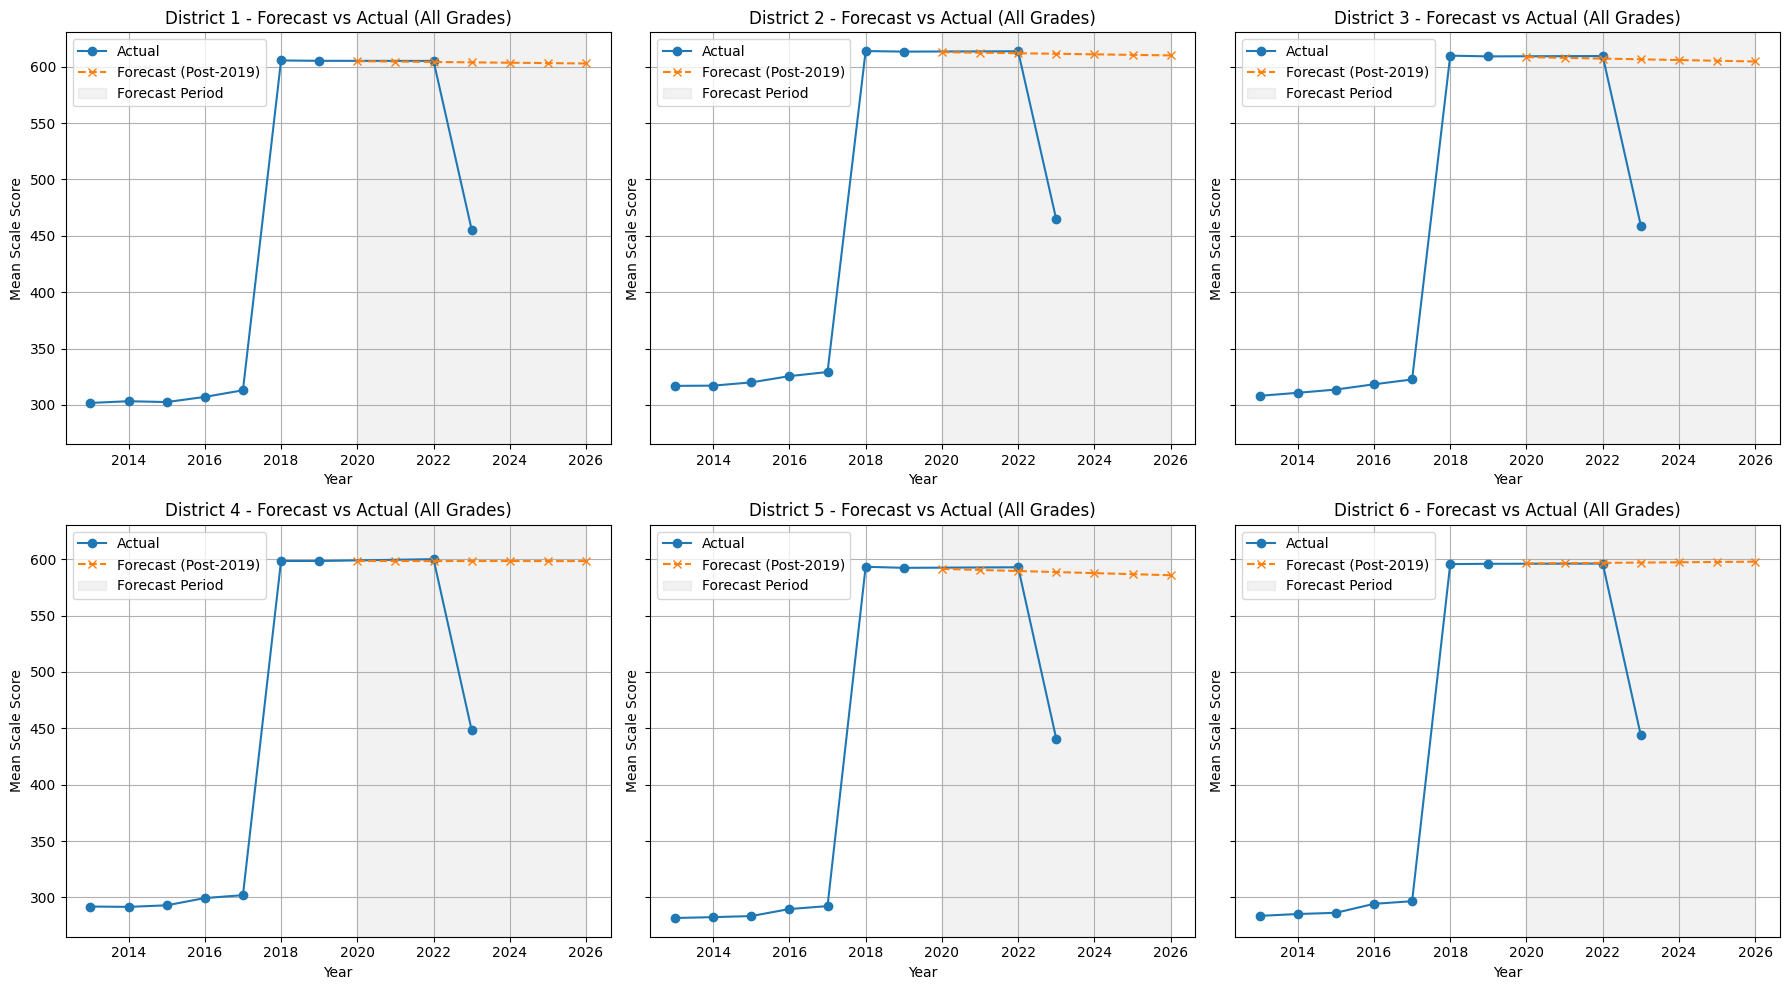

In [ ]:

for district in pre_ela_all_ts_df["District"].unique():
    district_data = pre_ela_all_ts_df[pre_ela_all_ts_df["District"] == district].sort_values("Year")

    if len(district_data) < 2:
        continue

    model = ExponentialSmoothing(
        district_data["Mean Scale Score"],
        trend="add",
        seasonal=None,
        initialization_method="estimated"
    )
    fit = model.fit()
    forecast = fit.forecast(len(forecast_years))

    forecast_allgrades[district] = {
        "years": forecast_years,
        "forecast": forecast.values
    }

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharey=True)
axes = axes.flatten()

for i, district in enumerate(sorted(forecast_allgrades.keys())[:6]):
    actual = ela_all_ts_df[ela_all_ts_df["District"] == district]
    forecast_data = forecast_allgrades[district]

    ax = axes[i]
    ax.plot(actual["Year"], actual["Mean Scale Score"], label="Actual", marker='o')
    ax.plot(forecast_data["years"], forecast_data["forecast"], label="Forecast (Post-2019)", linestyle="--", marker='x')
    ax.axvspan(2020, 2026, color='gray', alpha=0.1, label="Forecast Period")
    ax.set_title(f"District {district} - Forecast vs Actual (All Grades)")
    ax.set_xlabel("Year")
    ax.set_ylabel("Mean Scale Score")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


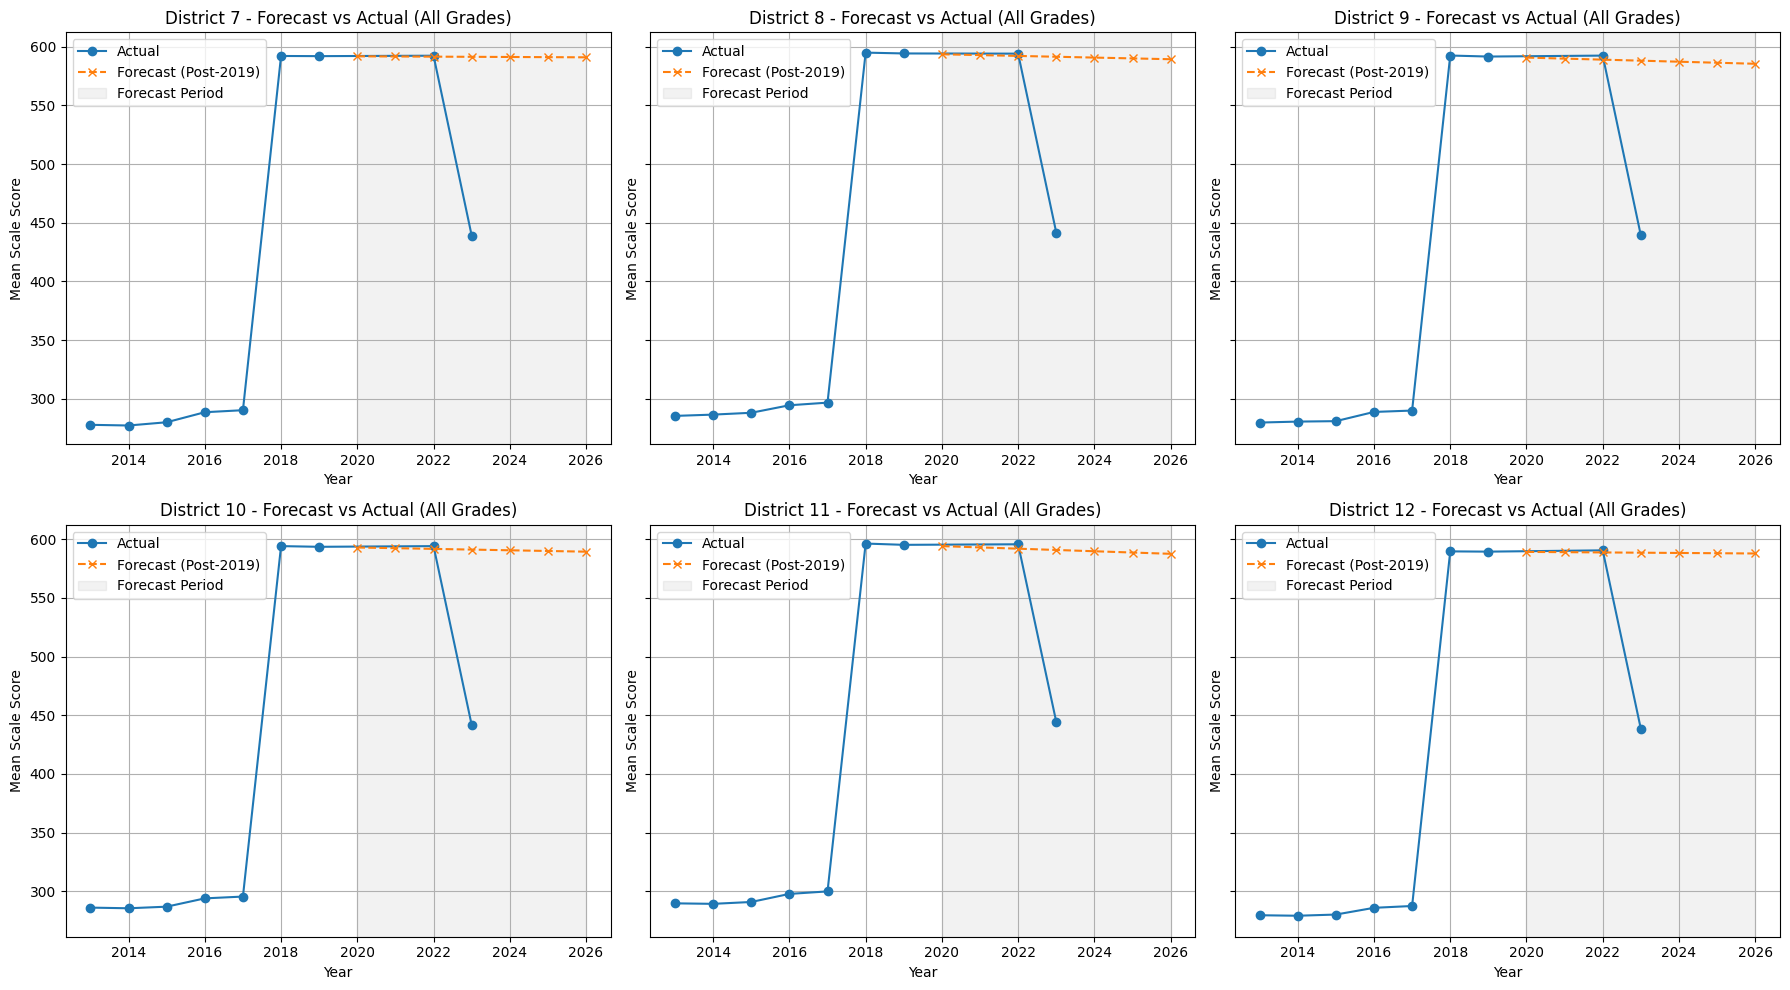

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharey=True)
axes = axes.flatten()

for i, district in enumerate(sorted(forecast_allgrades.keys())[6:12]):
    actual = ela_all_ts_df[ela_all_ts_df["District"] == district]
    forecast_data = forecast_allgrades[district]

    ax = axes[i]
    ax.plot(actual["Year"], actual["Mean Scale Score"], label="Actual", marker='o')
    ax.plot(forecast_data["years"], forecast_data["forecast"], label="Forecast (Post-2019)", linestyle="--", marker='x')
    ax.axvspan(2020, 2026, color='gray', alpha=0.1, label="Forecast Period")
    ax.set_title(f"District {district} - Forecast vs Actual (All Grades)")
    ax.set_xlabel("Year")
    ax.set_ylabel("Mean Scale Score")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

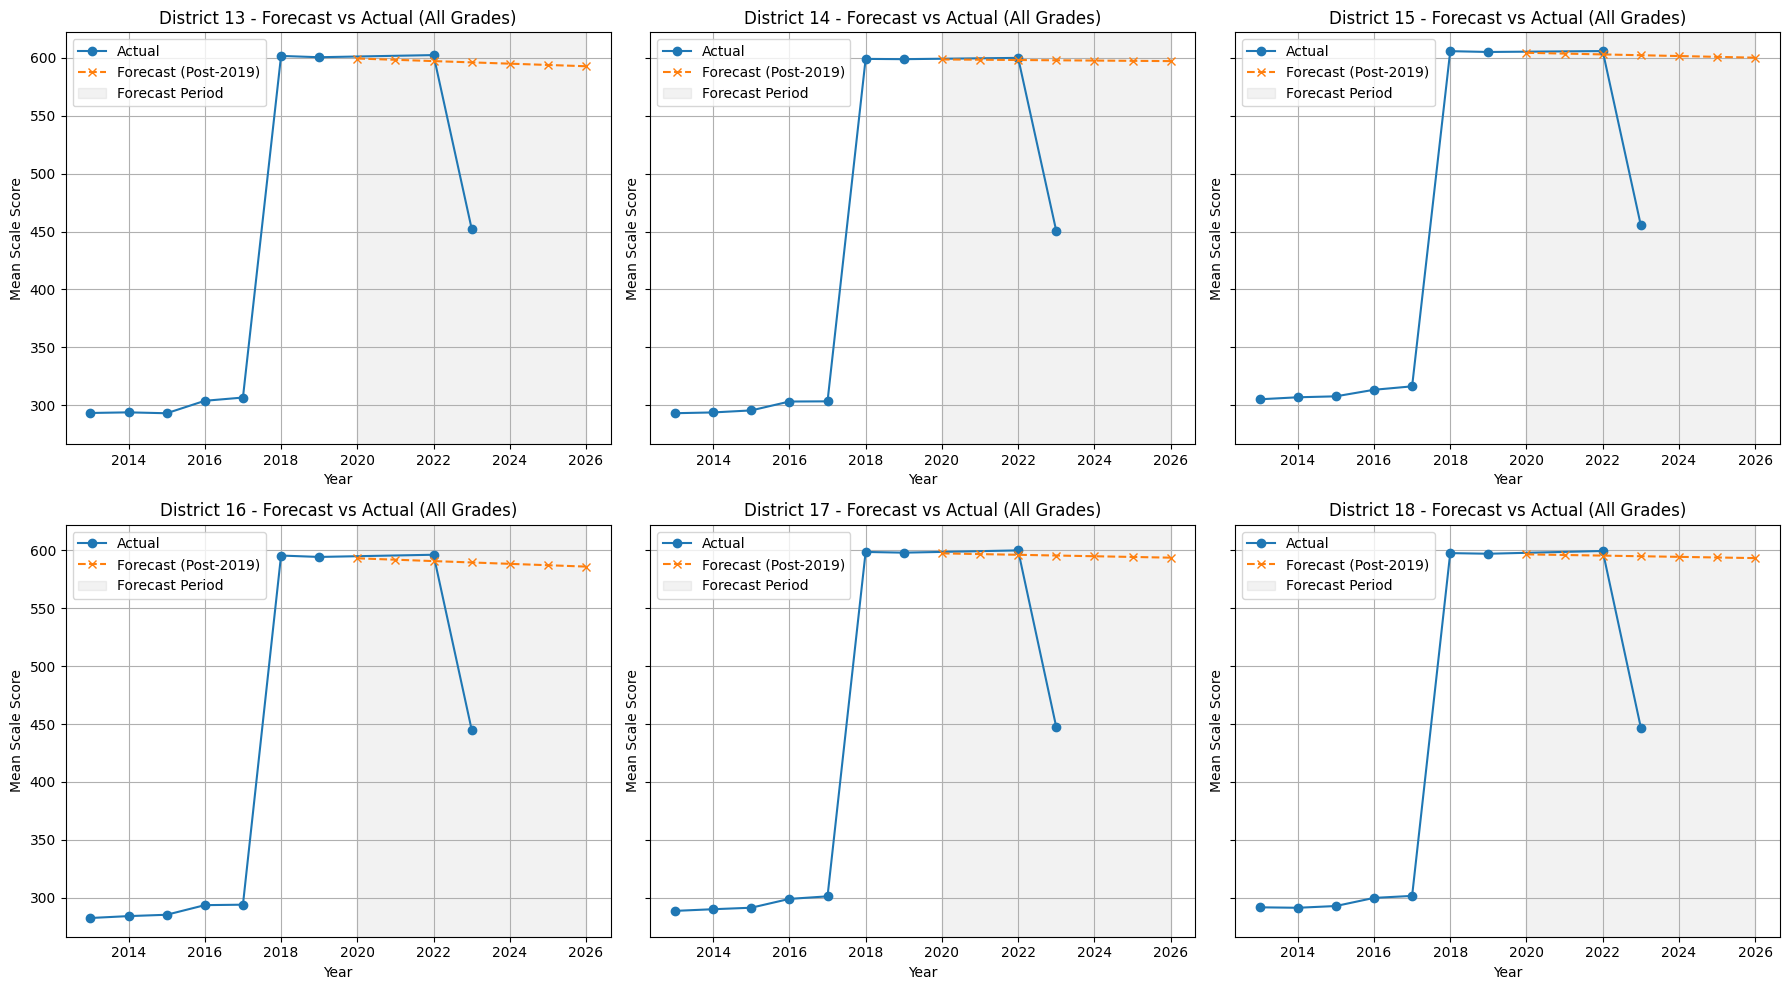

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharey=True)
axes = axes.flatten()

for i, district in enumerate(sorted(forecast_allgrades.keys())[12:18]):
    actual = ela_all_ts_df[ela_all_ts_df["District"] == district]
    forecast_data = forecast_allgrades[district]

    ax = axes[i]
    ax.plot(actual["Year"], actual["Mean Scale Score"], label="Actual", marker='o')
    ax.plot(forecast_data["years"], forecast_data["forecast"], label="Forecast (Post-2019)", linestyle="--", marker='x')
    ax.axvspan(2020, 2026, color='gray', alpha=0.1, label="Forecast Period")
    ax.set_title(f"District {district} - Forecast vs Actual (All Grades)")
    ax.set_xlabel("Year")
    ax.set_ylabel("Mean Scale Score")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharey=True)
axes = axes.flatten()

for i, district in enumerate(sorted(forecast_allgrades.keys())[18:24]):
    actual = ela_all_ts_df[ela_all_ts_df["District"] == district]
    forecast_data = forecast_allgrades[district]

    ax = axes[i]
    ax.plot(actual["Year"], actual["Mean Scale Score"], label="Actual", marker='o')
    ax.plot(forecast_data["years"], forecast_data["forecast"], label="Forecast (Post-2019)", linestyle="--", marker='x')
    ax.axvspan(2020, 2026, color='gray', alpha=0.1, label="Forecast Period")
    ax.set_title(f"District {district} - Forecast vs Actual (All Grades)")
    ax.set_xlabel("Year")
    ax.set_ylabel("Mean Scale Score")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

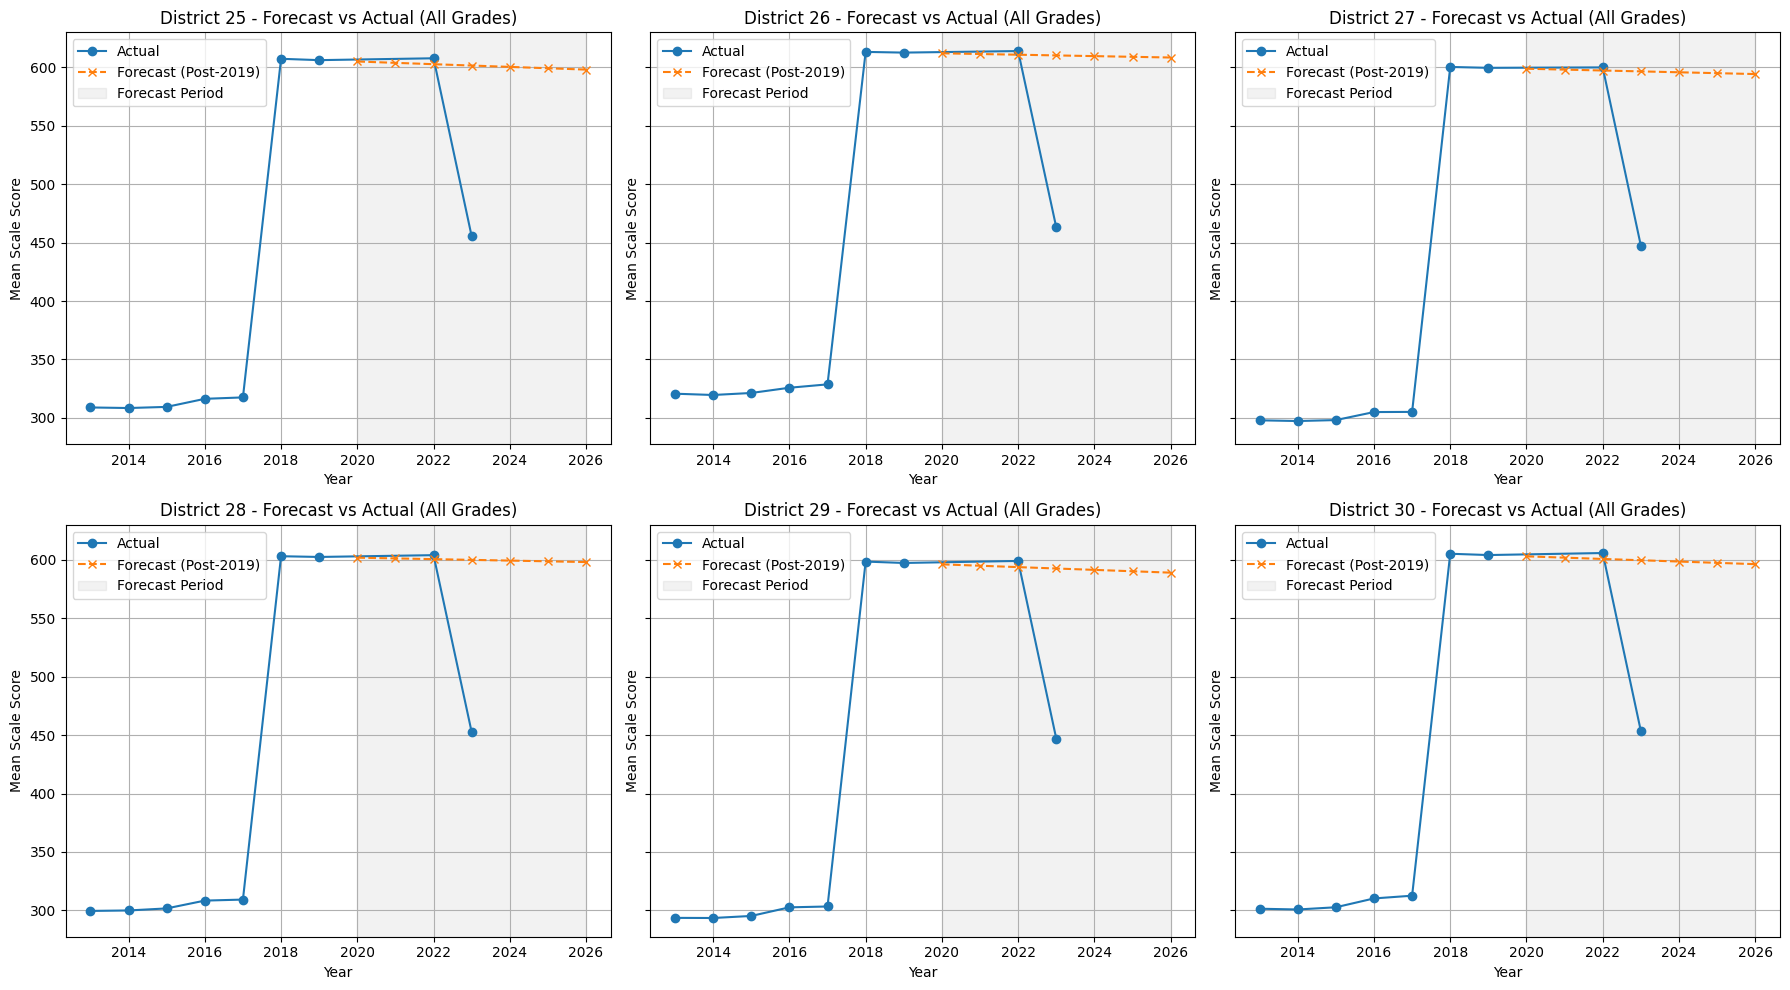

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharey=True)
axes = axes.flatten()

for i, district in enumerate(sorted(forecast_allgrades.keys())[24:30]):
    actual = ela_all_ts_df[ela_all_ts_df["District"] == district]
    forecast_data = forecast_allgrades[district]

    ax = axes[i]
    ax.plot(actual["Year"], actual["Mean Scale Score"], label="Actual", marker='o')
    ax.plot(forecast_data["years"], forecast_data["forecast"], label="Forecast (Post-2019)", linestyle="--", marker='x')
    ax.axvspan(2020, 2026, color='gray', alpha=0.1, label="Forecast Period")
    ax.set_title(f"District {district} - Forecast vs Actual (All Grades)")
    ax.set_xlabel("Year")
    ax.set_ylabel("Mean Scale Score")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

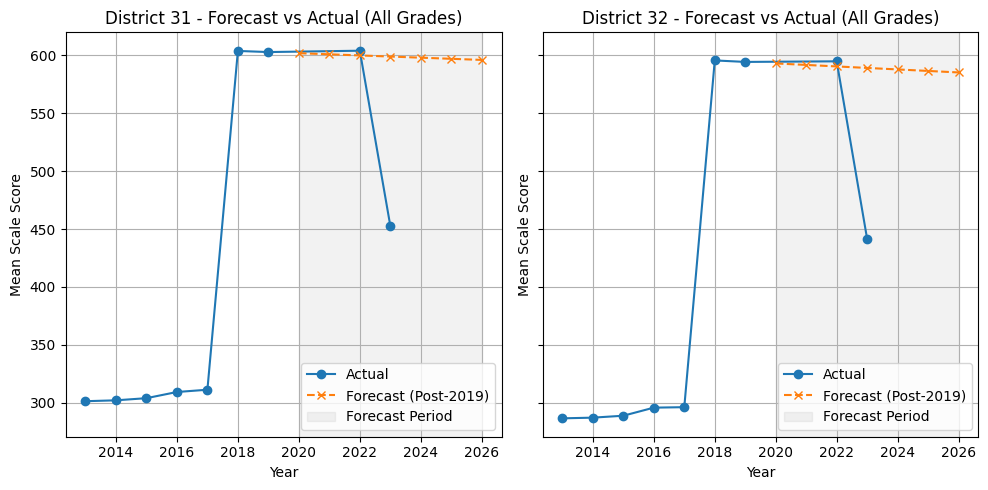

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)
axes = axes.flatten()

for i, district in enumerate(sorted(forecast_allgrades.keys())[30:32]):
    actual = ela_all_ts_df[ela_all_ts_df["District"] == district]
    forecast_data = forecast_allgrades[district]

    ax = axes[i]
    ax.plot(actual["Year"], actual["Mean Scale Score"], label="Actual", marker='o')
    ax.plot(forecast_data["years"], forecast_data["forecast"], label="Forecast (Post-2019)", linestyle="--", marker='x')
    ax.axvspan(2020, 2026, color='gray', alpha=0.1, label="Forecast Period")
    ax.set_title(f"District {district} - Forecast vs Actual (All Grades)")
    ax.set_xlabel("Year")
    ax.set_ylabel("Mean Scale Score")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

These graphs look pretty similar but all had a similar trend. All districts declined compared to their projections.



In [ ]:
comparison_results = []

for district in sorted(forecast_allgrades.keys()):
    forecast_2023 = forecast_allgrades[district]["forecast"][-1]
    actual_row = ela_all_ts_df[(ela_all_ts_df["District"] == district) & (ela_all_ts_df["Year"] == 2023)]

    if not actual_row.empty:
        actual_2023 = actual_row["Mean Scale Score"].values[0]
        difference = actual_2023 - forecast_2023
        comparison_results.append({
            "District": district,
            "Forecast 2023": forecast_2023,
            "Actual 2023": actual_2023,
            "Absolute Difference": abs(difference)
        })


comparison_df = pd.DataFrame(comparison_results)
comparison_df = comparison_df.sort_values(by="Absolute Difference", ascending=False)

In [ ]:
comparison_df

,District,Forecast 2023,Actual 2023,Absolute Difference
5,6,597.767378,443.628296,154.139082
6,7,591.000412,439.074127,151.926285
3,4,598.277894,448.305115,149.972779
11,12,587.874644,438.335999,149.538646
20,21,600.912439,452.703217,148.209222
7,8,589.372608,441.598907,147.773700
9,10,589.418474,441.745727,147.672746
0,1,602.816177,455.433411,147.382766
26,27,594.277844,447.375458,146.902387
19,20,603.503193,456.807373,146.695820


In [ ]:
ela_proficiency_df = ela_all_ts_df[
    (ela_all_ts_df["Category"] == "All Students") &
    (ela_all_ts_df["Grade"] == "All Grades")
][["District", "Year", "% Level 3+4"]]


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the

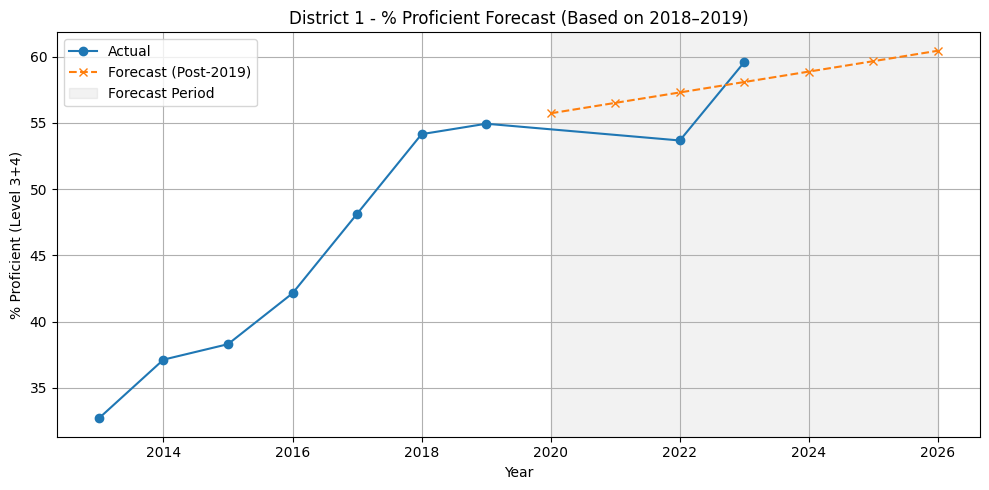

In [ ]:

pre_covid_proficiency_df = ela_proficiency_df[ela_proficiency_df["Year"].isin([2018, 2019])]

forecast_years = list(range(2020, 2027))

proficiency_forecast = {}

for district in pre_covid_proficiency_df["District"].unique():
    district_data = pre_covid_proficiency_df[pre_covid_proficiency_df["District"] == district].sort_values("Year")

    if len(district_data) < 2:
        continue

    model = ExponentialSmoothing(
        district_data["% Level 3+4"], trend="add", seasonal=None, initialization_method="estimated"
    )
    fit = model.fit()
    forecast = fit.forecast(len(forecast_years))

    proficiency_forecast[district] = {
        "years": forecast_years,
        "forecast": forecast.values
    }

actual_d1 = ela_proficiency_df[ela_proficiency_df["District"] == 1]

plt.figure(figsize=(10, 5))
plt.plot(actual_d1["Year"], actual_d1["% Level 3+4"], label="Actual", marker='o')
plt.plot(forecast_years, proficiency_forecast[1]["forecast"], label="Forecast (Post-2019)", linestyle="--", marker='x')
plt.axvspan(2020, 2026, color='gray', alpha=0.1, label="Forecast Period")
plt.title("District 1 - % Proficient Forecast (Based on 2018–2019)")
plt.xlabel("Year")
plt.ylabel("% Proficient (Level 3+4)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


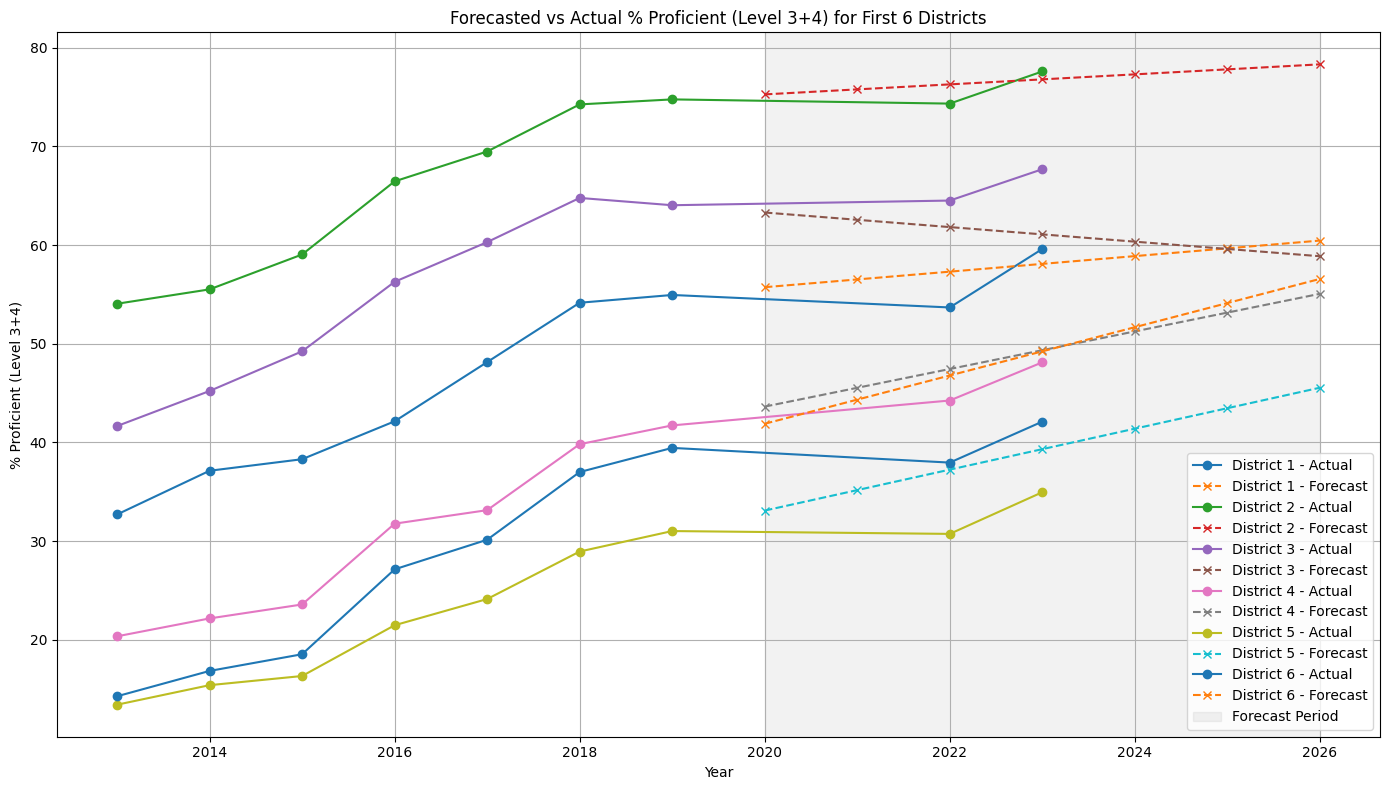

In [ ]:
first_6_districts = sorted(proficiency_forecast.keys())[:6]

plt.figure(figsize=(14, 8))
for district in first_6_districts:
    actual = ela_proficiency_df[ela_proficiency_df["District"] == district]
    forecast = proficiency_forecast[district]

    plt.plot(actual["Year"], actual["% Level 3+4"], label=f"District {district} - Actual", marker='o')
    plt.plot(forecast["years"], forecast["forecast"], label=f"District {district} - Forecast", linestyle='--', marker='x')

plt.axvspan(2020, 2026, color='gray', alpha=0.1, label="Forecast Period")
plt.title("Forecasted vs Actual % Proficient (Level 3+4) for First 6 Districts")
plt.xlabel("Year")
plt.ylabel("% Proficient (Level 3+4)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

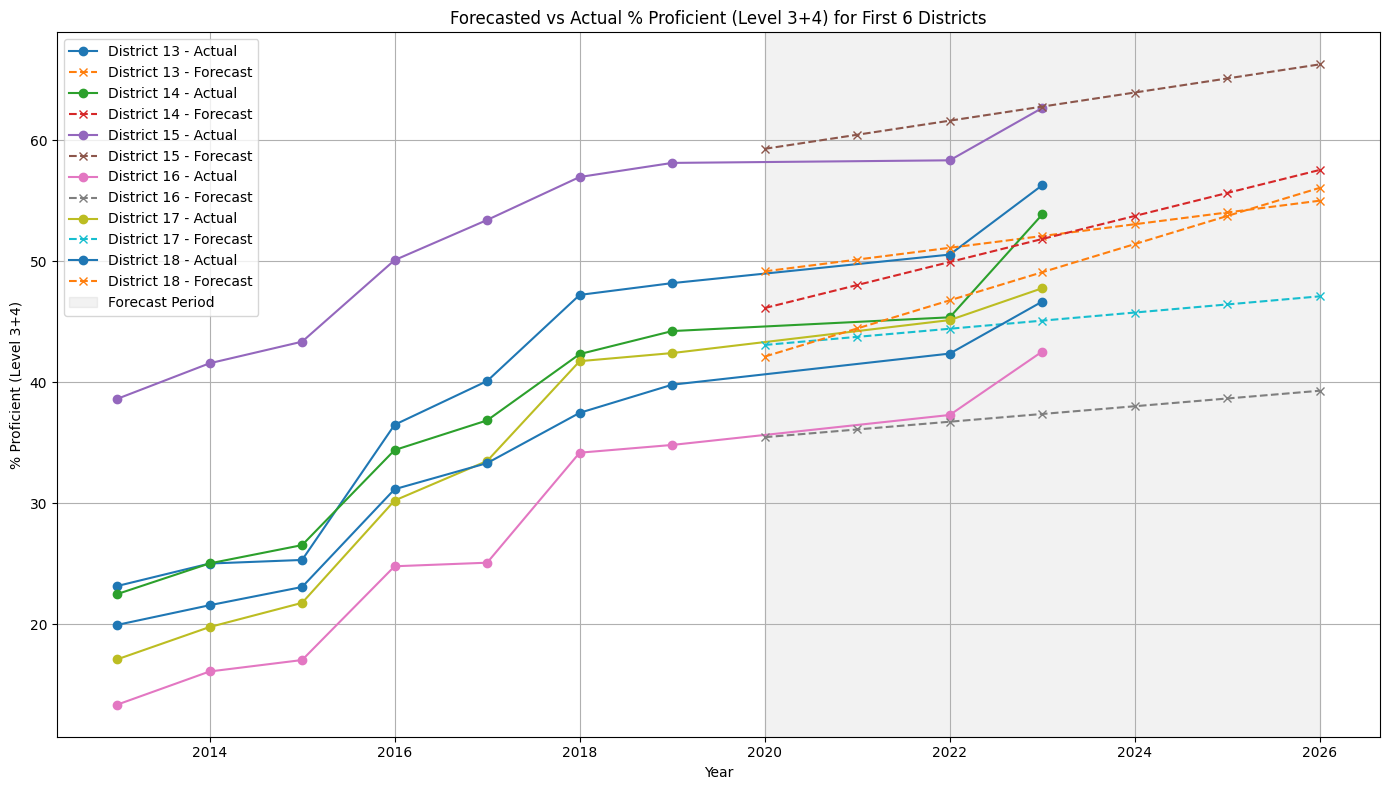

In [ ]:

plt.figure(figsize=(14, 8))
for district in sorted(proficiency_forecast.keys())[12:18]:
    actual = ela_proficiency_df[ela_proficiency_df["District"] == district]
    forecast = proficiency_forecast[district]

    plt.plot(actual["Year"], actual["% Level 3+4"], label=f"District {district} - Actual", marker='o')
    plt.plot(forecast["years"], forecast["forecast"], label=f"District {district} - Forecast", linestyle='--', marker='x')

plt.axvspan(2020, 2026, color='gray', alpha=0.1, label="Forecast Period")
plt.title("Forecasted vs Actual % Proficient (Level 3+4) for First 6 Districts")
plt.xlabel("Year")
plt.ylabel("% Proficient (Level 3+4)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
first_6_districts = sorted(proficiency_forecast.keys())[12:18]

plt.figure(figsize=(14, 8))
for district in first_6_districts:
    actual = ela_proficiency_df[ela_proficiency_df["District"] == district]
    forecast = proficiency_forecast[district]

    plt.plot(actual["Year"], actual["% Level 3+4"], label=f"District {district} - Actual", marker='o')
    plt.plot(forecast["years"], forecast["forecast"], label=f"District {district} - Forecast", linestyle='--', marker='x')

plt.axvspan(2020, 2026, color='gray', alpha=0.1, label="Forecast Period")
plt.title("Forecasted vs Actual % Proficient (Level 3+4) for First 6 Districts")
plt.xlabel("Year")
plt.ylabel("% Proficient (Level 3+4)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

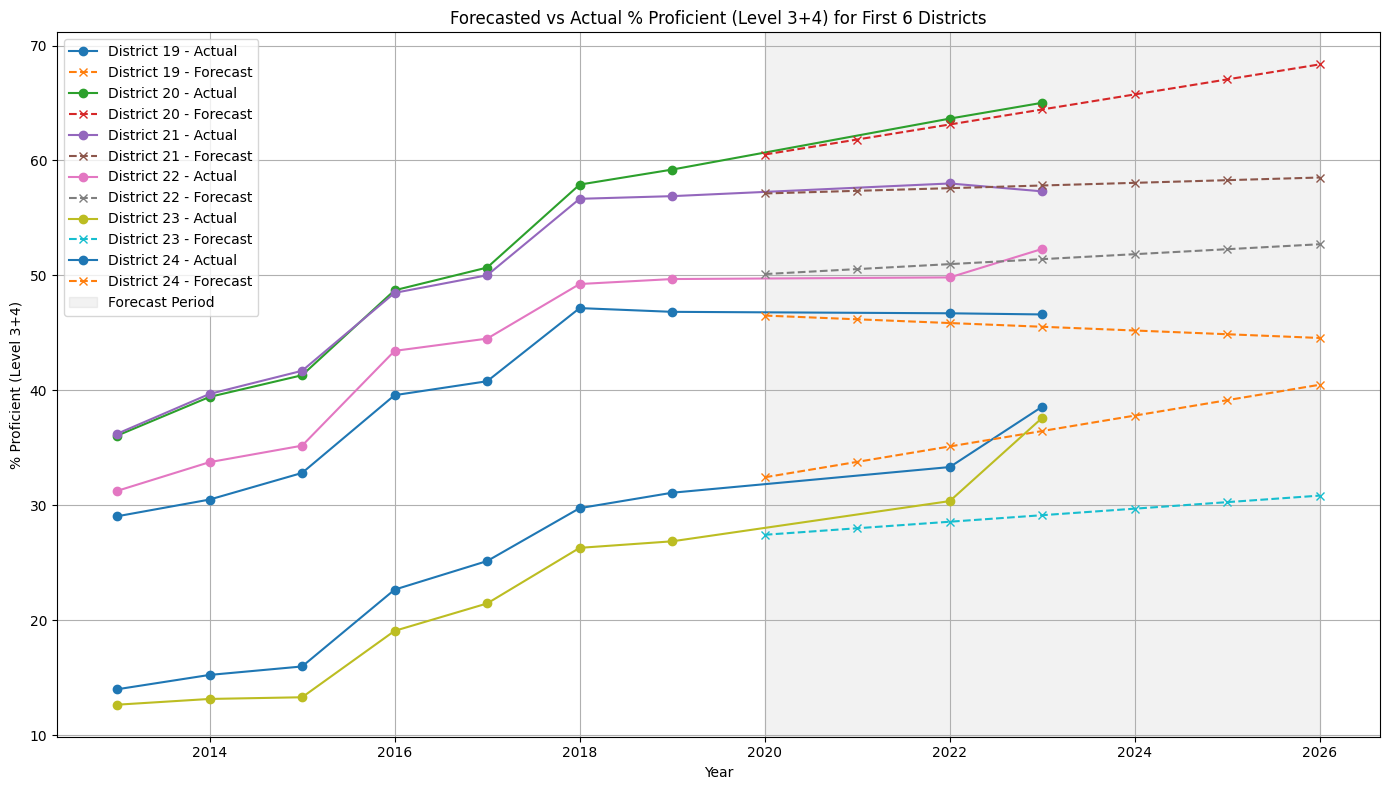

In [ ]:

plt.figure(figsize=(14, 8))
for district in sorted(proficiency_forecast.keys())[18:24]:
    actual = ela_proficiency_df[ela_proficiency_df["District"] == district]
    forecast = proficiency_forecast[district]

    plt.plot(actual["Year"], actual["% Level 3+4"], label=f"District {district} - Actual", marker='o')
    plt.plot(forecast["years"], forecast["forecast"], label=f"District {district} - Forecast", linestyle='--', marker='x')

plt.axvspan(2020, 2026, color='gray', alpha=0.1, label="Forecast Period")
plt.title("Forecasted vs Actual % Proficient (Level 3+4) for First 6 Districts")
plt.xlabel("Year")
plt.ylabel("% Proficient (Level 3+4)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:

plt.figure(figsize=(14, 8))
for district in sorted(proficiency_forecast.keys())[24:30]:
    actual = ela_proficiency_df[ela_proficiency_df["District"] == district]
    forecast = proficiency_forecast[district]

    plt.plot(actual["Year"], actual["% Level 3+4"], label=f"District {district} - Actual", marker='o')
    plt.plot(forecast["years"], forecast["forecast"], label=f"District {district} - Forecast", linestyle='--', marker='x')

plt.axvspan(2020, 2026, color='gray', alpha=0.1, label="Forecast Period")
plt.title("Forecasted vs Actual % Proficient (Level 3+4) for First 6 Districts")
plt.xlabel("Year")
plt.ylabel("% Proficient (Level 3+4)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Regression

In [ ]:
df=pd.read_excel("ela.xlsx",sheet_name="All")
df

,District,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
0,1,3,2023,All Students,520,451.532684,121,23.269230,114,21.923077,146,28.076923,139,26.730770,285,54.807693
1,1,4,2023,All Students,497,457.867218,72,14.486921,130,26.156942,118,23.742455,177,35.613682,295,59.356136
2,1,5,2023,All Students,523,455.086029,108,20.650095,104,19.885277,155,29.636711,156,29.827915,311,59.464626
3,1,6,2023,All Students,518,455.171814,74,14.285714,127,24.517374,131,25.289576,186,35.907337,317,61.196911
4,1,7,2023,All Students,568,456.084503,102,17.957747,132,23.239437,154,27.112677,180,31.690142,334,58.802818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,32,5,2013,All Students,1193,287.536469,585,49.036045,430,36.043587,137,11.483655,41,3.436714,178,14.920369
2012,32,6,2013,All Students,1336,287.276184,562,42.065868,559,41.841316,150,11.227545,65,4.865270,215,16.092813
2013,32,7,2013,All Students,1290,287.060455,602,46.666668,459,35.581394,188,14.573644,41,3.178295,229,17.751938
2014,32,8,2013,All Students,1287,283.314697,622,48.329449,446,34.654236,168,13.053613,51,3.962704,219,17.016317


In [ ]:
df["Year"] = pd.to_numeric(df["Year"])

In [ ]:
district_yearly_avg = df.groupby(["District", "Year"])["Mean Scale Score"].mean().reset_index()
district_yearly_avg = district_yearly_avg[district_yearly_avg["Year"].between(2018, 2023)]


In [ ]:
district_yearly_avg

,District,Year,Mean Scale Score
5,1,2018,605.520124
6,1,2019,605.152222
7,1,2022,605.023455
8,1,2023,455.431789
14,2,2018,613.779890
...,...,...,...
278,31,2023,452.822841
284,32,2018,595.608285
285,32,2019,594.199071
286,32,2022,594.301139


In [ ]:
district_yearly_avg = df.groupby(["District", "Year"])["Mean Scale Score"].mean().reset_index()
district_yearly_avg = district_yearly_avg[district_yearly_avg["Year"].between(2018, 2023)]

district_regression_results = []

for district in district_yearly_avg["District"].unique():
    df_district = district_yearly_avg[district_yearly_avg["District"] == district]
    if len(df_district) >= 2:
        model = ols("Q('Mean Scale Score') ~ Year", data=df_district).fit()
        district_regression_results.append({
            "District": district,
            "R-squared": model.rsquared,
            "Coef (Year)": model.params["Year"],
            "P-value": model.pvalues["Year"]
        })

district_regression_df = pd.DataFrame(district_regression_results)


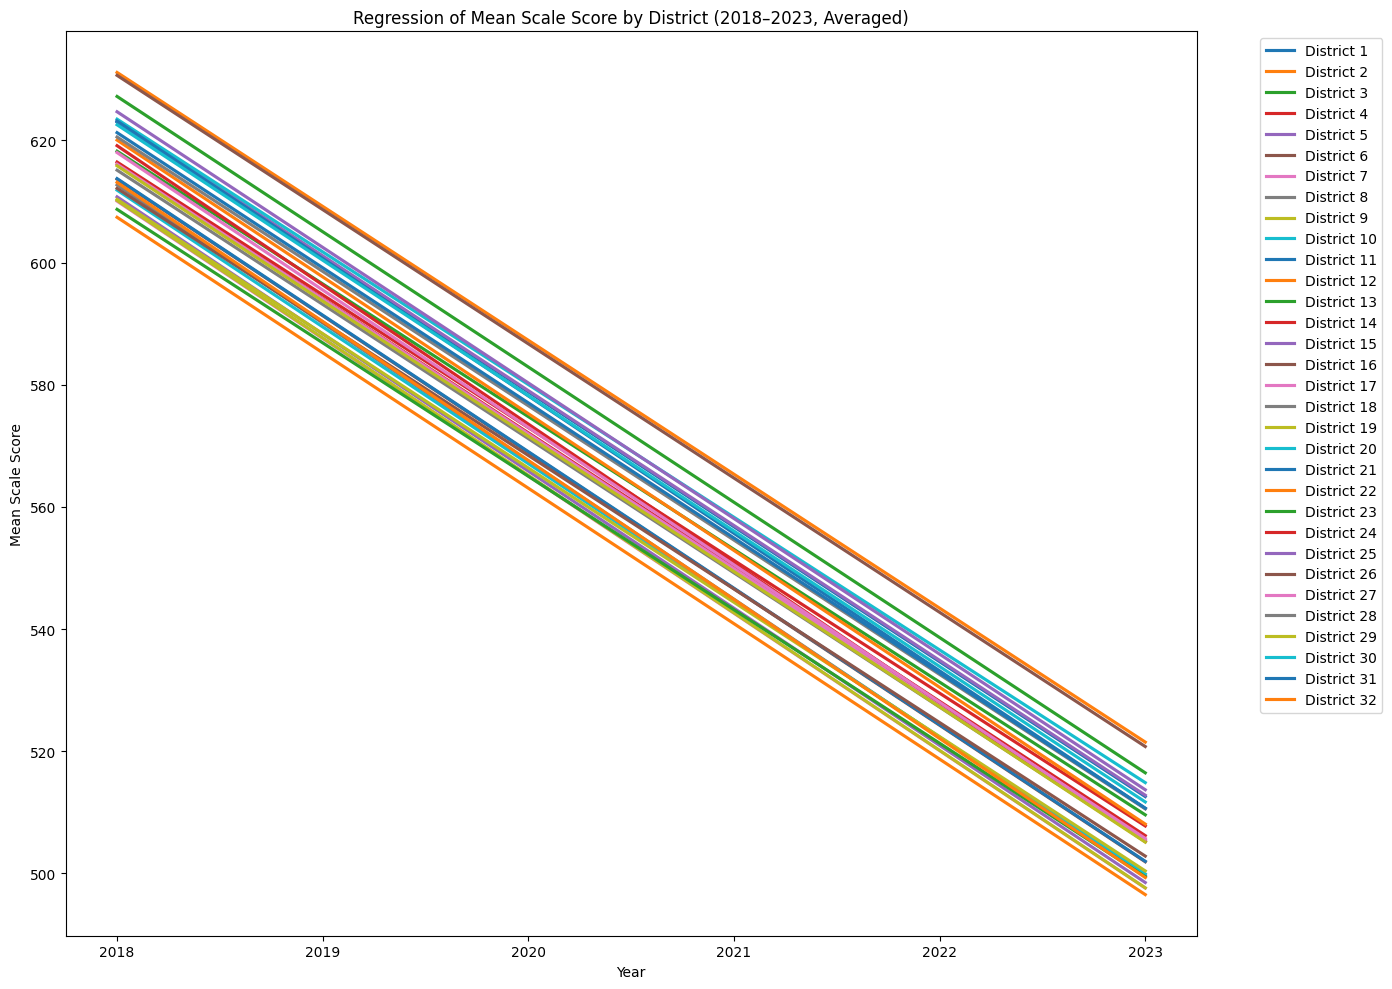

In [ ]:
plt.figure(figsize=(14, 10))

for district in district_yearly_avg["District"].unique():
    df_district = district_yearly_avg[district_yearly_avg["District"] == district]
    sns.regplot(data=df_district, x="Year", y="Mean Scale Score", ci=None, label=f"District {district}", scatter=False)

plt.title("Regression of Mean Scale Score by District (2018–2023, Averaged)")
plt.xlabel("Year")
plt.ylabel("Mean Scale Score")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
grade_yearly_avg = df.groupby(["Grade", "Year"])["Mean Scale Score"].mean().reset_index()

grade_yearly_avg = grade_yearly_avg[grade_yearly_avg["Year"].between(2018, 2023)]

grade_regression_results = []

for grade in grade_yearly_avg["Grade"].unique():
    df_grade = grade_yearly_avg[grade_yearly_avg["Grade"] == grade]
    if len(df_grade) >= 2:
        model = ols("Q('Mean Scale Score') ~ Year", data=df_grade).fit()
        grade_regression_results.append({
            "Grade": grade,
            "R-squared": model.rsquared,
            "Coef (Year)": model.params["Year"],
            "P-value": model.pvalues["Year"]
        })

grade_regression_df = pd.DataFrame(grade_regression_results)


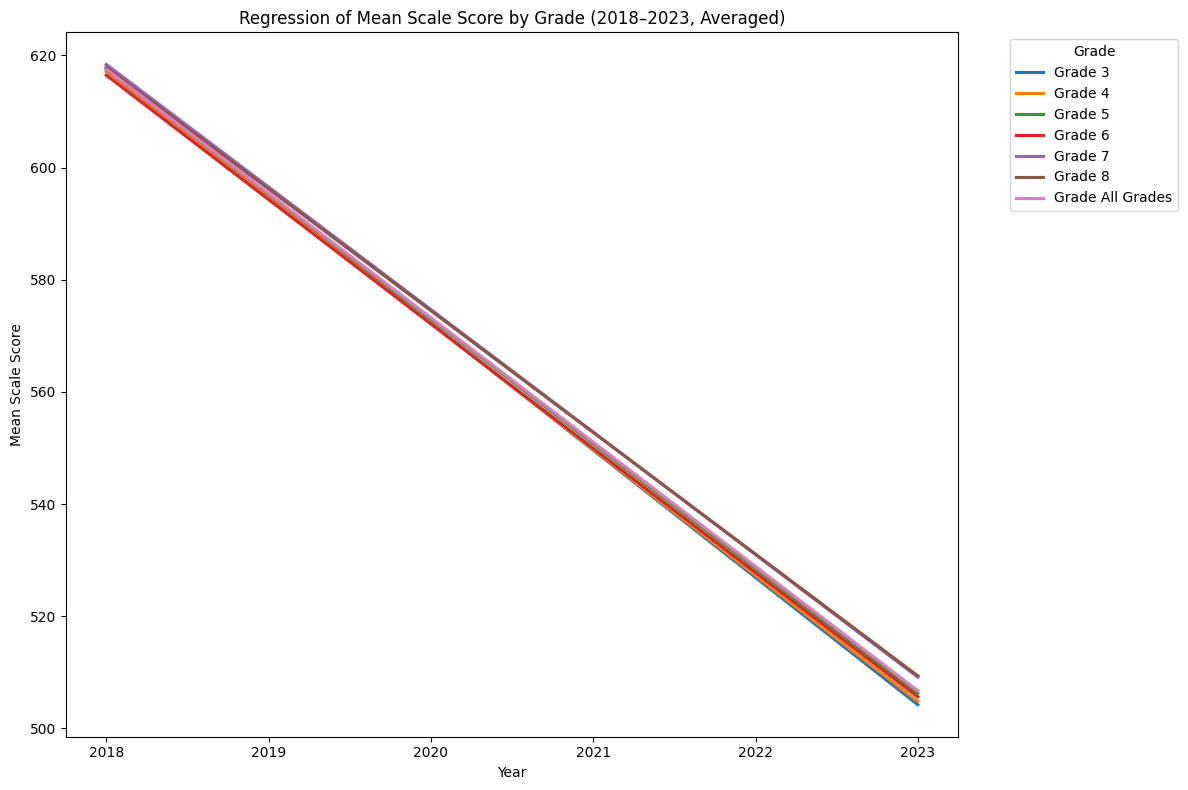

In [ ]:
plt.figure(figsize=(12, 8))

for grade in grade_yearly_avg["Grade"].unique():
    df_grade = grade_yearly_avg[grade_yearly_avg["Grade"] == grade]
    sns.regplot(data=df_grade, x="Year", y="Mean Scale Score", ci=None, label=f"Grade {grade}", scatter=False)

plt.title("Regression of Mean Scale Score by Grade (2018–2023, Averaged)")
plt.xlabel("Year")
plt.ylabel("Mean Scale Score")
plt.legend(title="Grade", bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
district_yearly_avg = df.groupby(["District", "Year"])["Mean Scale Score"].mean().reset_index()


district_regression_results = []

for district in district_yearly_avg["District"].unique():
    df_district = district_yearly_avg[district_yearly_avg["District"] == district]
    model = ols("Q('Mean Scale Score') ~ Year", data=df_district).fit()

    district_regression_results.append({
        "District": district,
        "R-squared": model.rsquared,
        "Coef (Year)": model.params["Year"],
        "P-value": model.pvalues["Year"]
    })

district_regression_df = pd.DataFrame(district_regression_results)

#Showing significant districts only
significant = district_regression_df[district_regression_df["P-value"] < 0.05]
significant

,District,R-squared,Coef (Year),P-value
0,1,0.509985,30.307717,0.030678
1,2,0.507023,29.424536,0.031394
2,3,0.508489,29.756703,0.031038
3,4,0.513460,30.771341,0.029853
4,5,0.512380,31.099249,0.030108
5,6,0.514903,31.175422,0.029516
6,7,0.516124,31.500524,0.029233
7,8,0.509485,30.757768,0.030798
8,9,0.512578,31.270291,0.030061
9,10,0.510503,30.815455,0.030554


### By Grade

In [ ]:
df_grade3 = df[
    (df["Grade"] == 3) &
    (df["Year"].between(2018, 2023)) &
    (df["Category"] == "All Students")
]

model = ols("Q('Mean Scale Score') ~ Year", data=df_grade3).fit()
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q('Mean Scale Score')   R-squared:                       0.492
Model:                               OLS   Adj. R-squared:                  0.488
Method:                    Least Squares   F-statistic:                     122.0
Date:                   Tue, 13 May 2025   Prob (F-statistic):           3.00e-20
Time:                           00:35:23   Log-Likelihood:                -675.91
No. Observations:                    128   AIC:                             1356.
Df Residuals:                        126   BIC:                             1362.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.641e+04   4151.127     11.179      0.000    3.82e+04    5.46e+04
Year         -22.6904      2.055    -11.044      0.000     -26.756     -18.625
==============================================================================
Omnibus:                       23.957   Durbin-Watson:                   2.602
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.622
Skew:                           0.382   Prob(JB):                       0.0134
Kurtosis:                       1.984   Cond. No.                     1.98e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

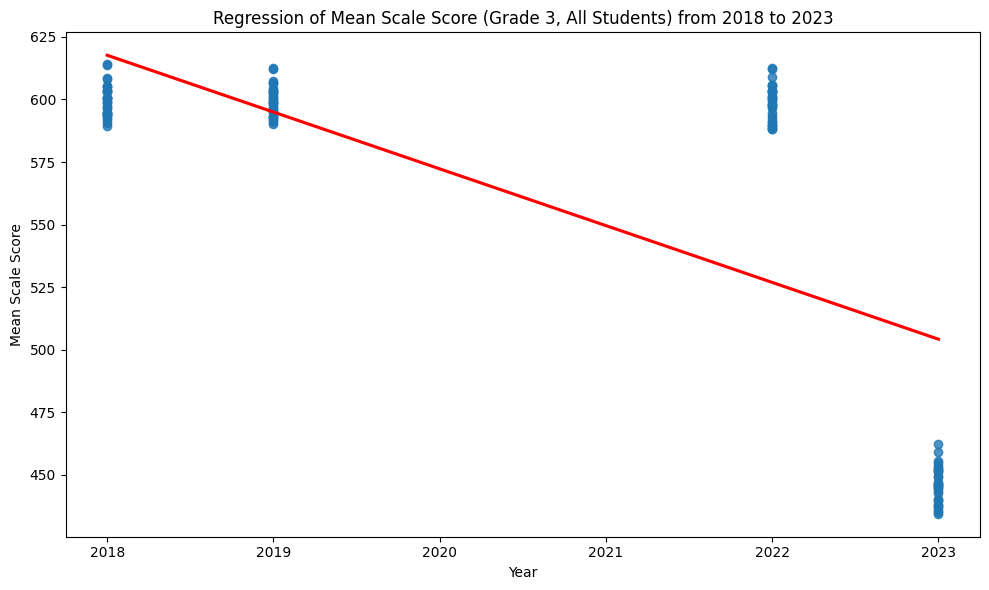

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_grade3, x="Year", y="Mean Scale Score", ci=None, line_kws={"color": "red"})

plt.title("Regression of Mean Scale Score (Grade 3, All Students) from 2018 to 2023")
plt.xlabel("Year")
plt.ylabel("Mean Scale Score")
plt.tight_layout()
plt.show()

## Ethnicity

In [ ]:
ela_ethnicity_all = ela_ethnicity_df[ela_ethnicity_df["Grade"] == "All Grades"].copy()

In [ ]:
ela_ethnicity_all["Mean Scale Score"] = pd.to_numeric(ela_ethnicity_all["Mean Scale Score"], errors='coerce')
ethnicity_district_year_avg = (
    ela_ethnicity_all
    .groupby(["Category", "District", "Year"])["Mean Scale Score"]
    .mean()
    .reset_index()
)

In [ ]:
ethnicity_regression_results = []
for group in ethnicity_district_year_avg["Category"].unique():
    df_group = ethnicity_district_year_avg[ethnicity_district_year_avg["Category"] == group]
    model = ols("Q('Mean Scale Score') ~ Year", data=df_group).fit()

    ethnicity_regression_results.append({
        "Ethnicity": group,
        "R-squared": model.rsquared,
        "Coef (Year)": model.params["Year"],
        "P-value": model.pvalues["Year"]
    })

ethnicity_regression_df = pd.DataFrame(ethnicity_regression_results)

In [ ]:
ethnicity_regression_df

,Ethnicity,R-squared,Coef (Year),P-value
0,Asian,0.505247,30.106699,1.085843e-42
1,Black,0.518762,31.443197,7.424735e-47
2,Hispanic,0.508866,30.698171,4.573159e-46
3,Multi-Racial,0.502000,29.432103,2.035276e-39
4,Native American,0.510214,30.077526,1.079125e-39
5,White,0.506489,30.171489,4.575287e-42
